In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [2]:
# import pandas as pd

# # Sample DataFrame
# data = {
#     'category': ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C'],
#     'value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
# }
# df = pd.DataFrame(data)

# # Number of rows to sample from each category
# n = 2

# # Sample 2 rows from each category
# sampled_df = df.groupby('category').apply(lambda x: x.sample(n=n, random_state=1)).reset_index(drop=True)

# print(sampled_df)


In [6]:
# # Generate data paths with labels
# train_data_dir = '/kaggle/working/news/test'
# filepaths = []
# labels = []

# folds = os.listdir(train_data_dir)
# for fold in folds:
#     foldpath = os.path.join(train_data_dir, fold)
#     filelist = os.listdir(foldpath)
#     for file in filelist:
#         fpath = os.path.join(foldpath, file)
        
#         filepaths.append(fpath)
#         labels.append(fold)

# # Concatenate data paths with labels into one dataframe
# Fseries = pd.Series(filepaths, name= 'filepaths')
# Lseries = pd.Series(labels, name='labels')
# valid_df = pd.concat([Fseries, Lseries], axis= 1)
# valid_df = valid_df.sample(frac=1).reset_index(drop=True)


In [7]:
# test_df

In [3]:
# # Generate data paths with labels
# train_data_dir = '/kaggle/working/news/test'
# filepaths = []
# labels = []

# folds = os.listdir(train_data_dir)
# for fold in folds:
#     foldpath = os.path.join(train_data_dir, fold)
#     filelist = os.listdir(foldpath)
#     for file in filelist:
#         fpath = os.path.join(foldpath, file)
        
#         filepaths.append(fpath)
#         labels.append(fold)

# # Concatenate data paths with labels into one dataframe
# Fseries = pd.Series(filepaths, name= 'filepaths')
# Lseries = pd.Series(labels, name='labels')
# test_df = pd.concat([Fseries, Lseries], axis= 1)
# test_df = test_df.sample(frac=1).reset_index(drop=True)


In [2]:
# Generate data paths with labels
train_data_dir = '/kaggle/input/poribohon-crop/check2'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
# train_data_dir = '/kaggle/working/news/test'

# folds = os.listdir(train_data_dir)
# for fold in folds:
#     foldpath = os.path.join(train_data_dir, fold)
#     filelist = os.listdir(foldpath)
#     for file in filelist:
#         fpath = os.path.join(foldpath, file)
        
#         filepaths.append(fpath)
#         labels.append(fold)
#     # Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df = train_df.sample(frac=1).reset_index(drop=True)


In [3]:
train_df

filepaths    labels
0      /kaggle/input/poribohon-crop/check2/cng/cng (6...       cng
1      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
2      /kaggle/input/poribohon-crop/check2/rickshaw/v...  rickshaw
3      /kaggle/input/poribohon-crop/check2/leguna/leg...    leguna
4      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
...                                                  ...       ...
26799  /kaggle/input/poribohon-crop/check2/launch/lau...    launch
26800  /kaggle/input/poribohon-crop/check2/bicycle/bi...   bicycle
26801  /kaggle/input/poribohon-crop/check2/bus/mixed ...       bus
26802  /kaggle/input/poribohon-crop/check2/car/mixed ...       car
26803  /kaggle/input/poribohon-crop/check2/boat/launc...      boat

[26804 rows x 2 columns]

In [4]:
26804*.20

5360.8

In [7]:
5355/15

357.0

In [6]:
train_df['labels'].value_counts()

labels
boat           3707
rickshaw       3332
car            3234
cng            2049
van            2029
bike           2004
bus            1690
launch         1689
truck          1648
bicycle        1609
easybike       1570
leguna          734
wheelbarrow     604
tractor         573
horsecart       332
Name: count, dtype: int64

In [7]:
train_df['labels'].value_counts()*.20

labels
boat           741.4
rickshaw       666.4
car            646.8
cng            409.8
van            405.8
bike           400.8
bus            338.0
launch         337.8
truck          329.6
bicycle        321.8
easybike       314.0
leguna         146.8
wheelbarrow    120.8
tractor        114.6
horsecart       66.4
Name: count, dtype: float64

In [4]:
sampling_dict = {
    'boat': 702,
    'rickshaw': 751,
    'car': 705,
    'cng': 503,
    'van': 509,
    'bike': 505,
    'bus': 354,
    'launch': 240,
    'truck': 290,
    'bicycle': 210,
    'easybike': 320,
    'leguna': 85,
    'wheelbarrow': 78,
    'tractor': 43,
    'horsecart': 45
}

# Create an empty DataFrame for the test set
test_df = pd.DataFrame()

# Sample rows from each category based on the sampling dictionary
for label, n in sampling_dict.items():
    if label in train_df['labels'].unique():
        sampled_df = train_df[train_df['labels'] == label].sample(n=n, random_state=1)
        test_df = pd.concat([test_df, sampled_df])

# Determine the remaining rows by removing the sampled rows from the original DataFrame
remaining_indices = ~train_df.index.isin(test_df.index)
train_df = train_df[remaining_indices]

# Reset index for consistency
test_df = test_df.reset_index(drop=True)
# train_df = train_df.reset_index(drop=True)

# Display the results
# print("Sampled Test DataFrame:")
# print(test_df)
# print("\nRemaining Training DataFrame:")
# print(train_df)


In [5]:

# # Number of rows to sample from each category
# n = 100

# # Sample rows from each category
# test_df = train_df.groupby('labels').apply(lambda x: x.sample(n=n, random_state=1)).reset_index(drop=True)

# # Determine the remaining rows by removing the sampled rows from the original DataFrame
# train_df = train_df.loc[~train_df.index.isin(test_df.index)]

# test_df

In [6]:
test_df

filepaths     labels
0     /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
1     /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
2     /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
3     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
4     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
...                                                 ...        ...
5335  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5336  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5337  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5338  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5339  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart

[5340 rows x 2 columns]

In [7]:
train_df

filepaths    labels
1      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
2      /kaggle/input/poribohon-crop/check2/rickshaw/v...  rickshaw
3      /kaggle/input/poribohon-crop/check2/leguna/leg...    leguna
4      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
7      /kaggle/input/poribohon-crop/check2/car/mixed ...       car
...                                                  ...       ...
26799  /kaggle/input/poribohon-crop/check2/launch/lau...    launch
26800  /kaggle/input/poribohon-crop/check2/bicycle/bi...   bicycle
26801  /kaggle/input/poribohon-crop/check2/bus/mixed ...       bus
26802  /kaggle/input/poribohon-crop/check2/car/mixed ...       car
26803  /kaggle/input/poribohon-crop/check2/boat/launc...      boat

[21464 rows x 2 columns]

In [8]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

filepaths     labels
0     /kaggle/input/poribohon-crop/check2/van/van (1...        van
1     /kaggle/input/poribohon-crop/check2/cng/cng (3...        cng
2     /kaggle/input/poribohon-crop/check2/cng/mixed ...        cng
3     /kaggle/input/poribohon-crop/check2/rickshaw/m...   rickshaw
4     /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
...                                                 ...        ...
5335  /kaggle/input/poribohon-crop/check2/bus/truck ...        bus
5336  /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
5337  /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
5338  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5339  /kaggle/input/poribohon-crop/check2/boat/boat ...       boat

[5340 rows x 2 columns]

In [9]:
test_df['labels'].value_counts()

labels
rickshaw       751
car            705
boat           702
van            509
bike           505
cng            503
bus            354
easybike       320
truck          290
launch         240
bicycle        210
leguna          85
wheelbarrow     78
horsecart       45
tractor         43
Name: count, dtype: int64

In [10]:
train_df

filepaths    labels
1      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
2      /kaggle/input/poribohon-crop/check2/rickshaw/v...  rickshaw
3      /kaggle/input/poribohon-crop/check2/leguna/leg...    leguna
4      /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
7      /kaggle/input/poribohon-crop/check2/car/mixed ...       car
...                                                  ...       ...
26799  /kaggle/input/poribohon-crop/check2/launch/lau...    launch
26800  /kaggle/input/poribohon-crop/check2/bicycle/bi...   bicycle
26801  /kaggle/input/poribohon-crop/check2/bus/mixed ...       bus
26802  /kaggle/input/poribohon-crop/check2/car/mixed ...       car
26803  /kaggle/input/poribohon-crop/check2/boat/launc...      boat

[21464 rows x 2 columns]

In [11]:
21464*.20

4292.8

In [12]:
1448/16

90.5

In [13]:
train_df['labels'].value_counts()

labels
boat           3005
rickshaw       2581
car            2529
cng            1546
van            1520
bike           1499
launch         1449
bicycle        1399
truck          1358
bus            1336
easybike       1250
leguna          649
tractor         530
wheelbarrow     526
horsecart       287
Name: count, dtype: int64

In [14]:
train_df['labels'].value_counts()*.20

labels
boat           601.0
rickshaw       516.2
car            505.8
cng            309.2
van            304.0
bike           299.8
launch         289.8
bicycle        279.8
truck          271.6
bus            267.2
easybike       250.0
leguna         129.8
tractor        106.0
wheelbarrow    105.2
horsecart       57.4
Name: count, dtype: float64

In [15]:
sampling_dict = {
    'boat': 452,
    'rickshaw': 450,
    'car': 562,
    'cng': 377,
    'van': 559,
    'bike': 286,
    'bus': 299,
    'launch': 245,
    'truck': 297,
    'bicycle': 215,
    'easybike': 220,
    'leguna': 100,
    'wheelbarrow': 86,
    'tractor': 92,
    'horsecart': 51
}

# Create an empty DataFrame for the test set
valid_df = pd.DataFrame()

# Sample rows from each category based on the sampling dictionary
for label, n in sampling_dict.items():
    if label in train_df['labels'].unique():
        sampled_df = train_df[train_df['labels'] == label].sample(n=n, random_state=1)
        valid_df = pd.concat([valid_df, sampled_df])

# Determine the remaining rows by removing the sampled rows from the original DataFrame
remaining_indices = ~train_df.index.isin(valid_df.index)
train_df = train_df[remaining_indices]

# Reset index for consistency
valid_df = valid_df.reset_index(drop=True)
# train_df = train_df.reset_index(drop=True)

# Display the results
# print("Sampled Test DataFrame:")
# print(test_df)
# print("\nRemaining Training DataFrame:")
# print(train_df)
valid_df

filepaths     labels
0     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
1     /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
2     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
3     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
4     /kaggle/input/poribohon-crop/check2/boat/boat ...       boat
...                                                 ...        ...
4286  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
4287  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
4288  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
4289  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
4290  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart

[4291 rows x 2 columns]

In [16]:
valid_df = valid_df.sample(frac=1).reset_index(drop=True)
valid_df

filepaths    labels
0     /kaggle/input/poribohon-crop/check2/bike/bike ...      bike
1     /kaggle/input/poribohon-crop/check2/cng/cng (1...       cng
2     /kaggle/input/poribohon-crop/check2/car/mixed ...       car
3     /kaggle/input/poribohon-crop/check2/bus/bus 33...       bus
4     /kaggle/input/poribohon-crop/check2/truck/cng ...     truck
...                                                 ...       ...
4286  /kaggle/input/poribohon-crop/check2/cng/cng (2...       cng
4287  /kaggle/input/poribohon-crop/check2/rickshaw/l...  rickshaw
4288  /kaggle/input/poribohon-crop/check2/rickshaw/m...  rickshaw
4289  /kaggle/input/poribohon-crop/check2/bus/mixed ...       bus
4290  /kaggle/input/poribohon-crop/check2/bike/bike ...      bike

[4291 rows x 2 columns]

In [53]:
train_df['labels'].value_counts()

labels
boat           2553
rickshaw       2131
car            1967
bike           1213
launch         1204
bicycle        1184
cng            1169
truck          1061
bus            1037
easybike       1030
van             961
leguna          549
wheelbarrow     440
tractor         438
horsecart       236
Name: count, dtype: int64

In [54]:
valid_df['labels'].value_counts()

labels
car            562
van            559
boat           452
rickshaw       450
cng            377
bus            299
truck          297
bike           286
launch         245
easybike       220
bicycle        215
leguna         100
tractor         92
wheelbarrow     86
horsecart       51
Name: count, dtype: int64

In [55]:
test_df['labels'].value_counts()

labels
rickshaw       751
car            705
boat           702
van            509
bike           505
cng            503
bus            354
easybike       320
truck          290
launch         240
bicycle        210
leguna          85
wheelbarrow     78
horsecart       45
tractor         43
Name: count, dtype: int64

In [60]:
236+51+45

332

In [61]:
702+452+2553

3707

In [16]:
train_df

filepaths    labels
3      /kaggle/input/poribohon-crop/check2/van/bike (...       van
4      /kaggle/input/poribohon-crop/check2/boat/boat ...      boat
5      /kaggle/input/poribohon-crop/check2/boat/mixed...      boat
6      /kaggle/input/poribohon-crop/check2/rickshaw/t...  rickshaw
7      /kaggle/input/poribohon-crop/check2/boat/launc...      boat
...                                                  ...       ...
26798  /kaggle/input/poribohon-crop/check2/boat/mixed...      boat
26799  /kaggle/input/poribohon-crop/check2/cng/bus 31...       cng
26800  /kaggle/input/poribohon-crop/check2/cng/mixed ...       cng
26801  /kaggle/input/poribohon-crop/check2/boat/boat ...      boat
26802  /kaggle/input/poribohon-crop/check2/easybike/m...  easybike

[17173 rows x 2 columns]

In [17]:
test_df

filepaths     labels
0     /kaggle/input/poribohon-crop/check2/van/van (1...        van
1     /kaggle/input/poribohon-crop/check2/cng/cng (3...        cng
2     /kaggle/input/poribohon-crop/check2/cng/mixed ...        cng
3     /kaggle/input/poribohon-crop/check2/rickshaw/m...   rickshaw
4     /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
...                                                 ...        ...
5335  /kaggle/input/poribohon-crop/check2/bus/truck ...        bus
5336  /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
5337  /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
5338  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5339  /kaggle/input/poribohon-crop/check2/boat/boat ...       boat

[5340 rows x 2 columns]

In [56]:
train_df.to_csv("/kaggle/working/train_data.csv")
valid_df.to_csv("/kaggle/working/valid_data.csv")
test_df.to_csv("/kaggle/working/test_data.csv")

In [11]:
train_df=pd.read_csv("/kaggle/working/train_data.csv")
valid_df=pd.read_csv("/kaggle/working/valid_data.csv")
test_df=pd.read_csv("/kaggle/working/test_data.csv")

In [12]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
valid_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

filepaths   labels
0      /kaggle/input/poribohon-crop/check2/bus/bus 10...      bus
1      /kaggle/input/poribohon-crop/check2/car/tracto...      car
2      /kaggle/input/poribohon-crop/check2/boat/launc...     boat
3      /kaggle/input/poribohon-crop/check2/bike/bike ...     bike
4      /kaggle/input/poribohon-crop/check2/tractor/tr...  tractor
...                                                  ...      ...
17168  /kaggle/input/poribohon-crop/check2/boat/boat ...     boat
17169  /kaggle/input/poribohon-crop/check2/cng/cng (6...      cng
17170  /kaggle/input/poribohon-crop/check2/tractor/tr...  tractor
17171  /kaggle/input/poribohon-crop/check2/boat/boat ...     boat
17172  /kaggle/input/poribohon-crop/check2/bicycle/bi...  bicycle

[17173 rows x 2 columns]

In [14]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

filepaths   labels
0      /kaggle/input/poribohon-crop/check2/launch/lau...   launch
1      /kaggle/input/poribohon-crop/check2/cng/mixed ...      cng
2      /kaggle/input/poribohon-crop/check2/cng/cng (3...      cng
3      /kaggle/input/poribohon-crop/check2/car/cng (1...      car
4      /kaggle/input/poribohon-crop/check2/truck/truc...    truck
...                                                  ...      ...
17168  /kaggle/input/poribohon-crop/check2/bicycle/bi...  bicycle
17169  /kaggle/input/poribohon-crop/check2/car/mixed ...      car
17170  /kaggle/input/poribohon-crop/check2/bus/bus 31...      bus
17171  /kaggle/input/poribohon-crop/check2/car/car (4...      car
17172  /kaggle/input/poribohon-crop/check2/bicycle/bi...  bicycle

[17173 rows x 2 columns]

In [15]:
# train_df, valid_df = train_test_split(train_df,  train_size= 0.8, shuffle= True, random_state= 123)

In [16]:
test_df

filepaths     labels
0     /kaggle/input/poribohon-crop/check2/van/van (1...        van
1     /kaggle/input/poribohon-crop/check2/cng/cng (3...        cng
2     /kaggle/input/poribohon-crop/check2/cng/mixed ...        cng
3     /kaggle/input/poribohon-crop/check2/rickshaw/m...   rickshaw
4     /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
...                                                 ...        ...
5335  /kaggle/input/poribohon-crop/check2/bus/truck ...        bus
5336  /kaggle/input/poribohon-crop/check2/boat/mixed...       boat
5337  /kaggle/input/poribohon-crop/check2/bike/bike ...       bike
5338  /kaggle/input/poribohon-crop/check2/horsecart/...  horsecart
5339  /kaggle/input/poribohon-crop/check2/boat/boat ...       boat

[5340 rows x 2 columns]

In [17]:
valid_df

filepaths    labels
0     /kaggle/input/poribohon-crop/check2/bike/bike ...      bike
1     /kaggle/input/poribohon-crop/check2/cng/cng (1...       cng
2     /kaggle/input/poribohon-crop/check2/car/mixed ...       car
3     /kaggle/input/poribohon-crop/check2/bus/bus 33...       bus
4     /kaggle/input/poribohon-crop/check2/truck/cng ...     truck
...                                                 ...       ...
4286  /kaggle/input/poribohon-crop/check2/cng/cng (2...       cng
4287  /kaggle/input/poribohon-crop/check2/rickshaw/l...  rickshaw
4288  /kaggle/input/poribohon-crop/check2/rickshaw/m...  rickshaw
4289  /kaggle/input/poribohon-crop/check2/bus/mixed ...       bus
4290  /kaggle/input/poribohon-crop/check2/bike/bike ...      bike

[4291 rows x 2 columns]

In [18]:
batch_size = 32
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
va_gen=  ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = va_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 17173 validated image filenames belonging to 15 classes.
Found 4291 validated image filenames belonging to 15 classes.
Found 5340 validated image filenames belonging to 15 classes.


In [52]:
17173+4291+5340

26804

In [57]:
26804*.20

5360.8

In [58]:
17173+4291

21464

In [59]:
21464*.20

4292.8

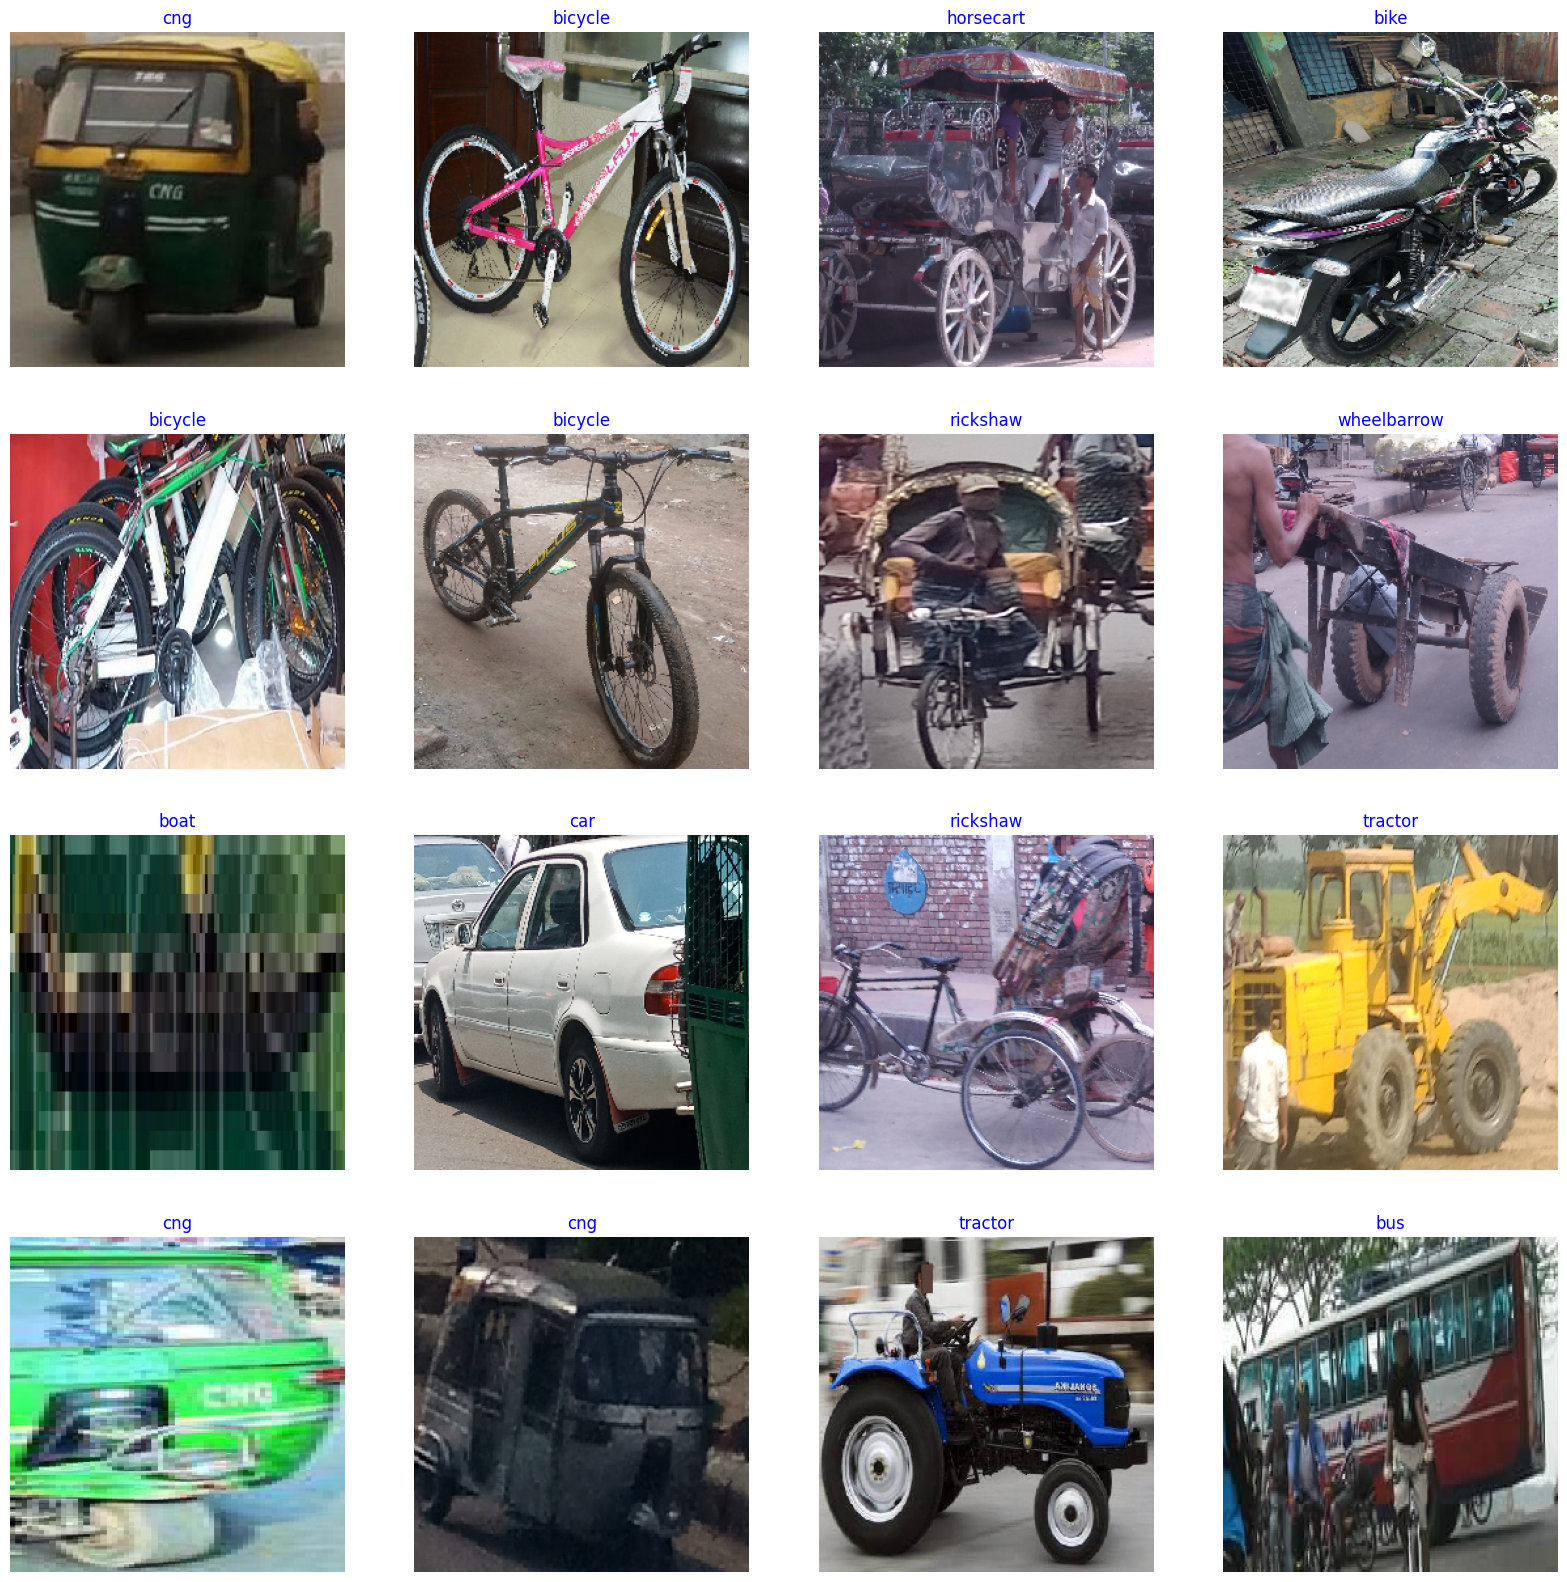

In [19]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [20]:
# Create Model Structure
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

epochs = 40

In [21]:
class_count

15

In [25]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
!pip install tensorflow-model-optimization


  Obtaining dependency information for tensorflow-model-optimization from https://files.pythonhosted.org/packages/5a/a0/f38c9ce977285d3f347f6d64cf227924fe9fc97d780d6df4a55563e311af/tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [23]:
# import tensorflow_model_optimization as tfmot
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import tensorflow_addons as tfa

In [24]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for multiclass classification.
    gamma: focusing parameter (higher gamma focuses more on hard misclassified examples)
    alpha: balancing factor (for class imbalance)
    """
    def focal_loss_fixed(y_true, y_pred):
        # Convert labels to float32 for numerical stability
        y_true = tf.cast(y_true, tf.float32)
        
        # Clip prediction values to prevent log(0) errors
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        
        # Cross-entropy loss
        cross_entropy = -y_true * K.log(y_pred)
        
        # Focal loss scaling factor
        weight = alpha * K.pow(1 - y_pred, gamma)
        
        # Compute the final loss
        loss = weight * cross_entropy
        return K.sum(loss, axis=-1)
    
    return focal_loss_fixed

In [25]:
# Assuming `img_shape` and `class_count` are already defined
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Build the model
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128, kernel_regularizer=regularizers.l2(0.016), 
          activity_regularizer=regularizers.l1(0.006), 
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.15, seed=123),
    Dense(class_count, activation='softmax')  # Softmax for multiclass classification
])

# Compile the model with the custom focal loss for multiclass classification
# model.compile(
#     optimizer=Adamax(learning_rate=0.001), 
#     loss=focal_loss(gamma=2., alpha=0.25),  # Apply custom focal loss
#     metrics=['accuracy']
# )

model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Apply custom focal loss
    metrics=['accuracy']
)
# Model summary
model.summary()


43941136/43941136 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                         

In [32]:
save_dir = '/kaggle/working/'
filepath = os.path.join(save_dir, 'eb3_poribohon_no_prunned.h5')
checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
with tf.device('/GPU:0'):
    history = model.fit(
        x=train_gen,
        epochs=40,
        verbose=1,
        validation_data=valid_gen,
        validation_steps=None,
        shuffle=False,
        callbacks=[checkpoint_callback]
    )

Epoch 1/40


2024-09-23 19:53:10.904107: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


537/537 [==============================] - ETA: 0s - loss: 1.3261 - accuracy: 0.8123
Epoch 1: val_loss improved from inf to 0.29478, saving model to /kaggle/working/eb3_poribohon_no_prunned.h5
537/537 [==============================] - 704s 1s/step - loss: 1.3261 - accuracy: 0.8123 - val_loss: 0.2948 - val_accuracy: 0.9243
Epoch 2/40
537/537 [==============================] - ETA: 0s - loss: 0.1775 - accuracy: 0.9321
Epoch 2: val_loss improved from 0.29478 to 0.12216, saving model to /kaggle/working/eb3_poribohon_no_prunned.h5
537/537 [==============================] - 572s 1s/step - loss: 0.1775 - accuracy: 0.9321 - val_loss: 0.1222 - val_accuracy: 0.9427
Epoch 3/40
537/537 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9570
Epoch 3: val_loss improved from 0.12216 to 0.09729, saving model to /kaggle/working/eb3_poribohon_no_prunned.h5
537/537 [==============================] - 555s 1s/step - loss: 0.1081 - accuracy: 0.9570 - val_loss: 0.0973 - val_accuracy: 0.

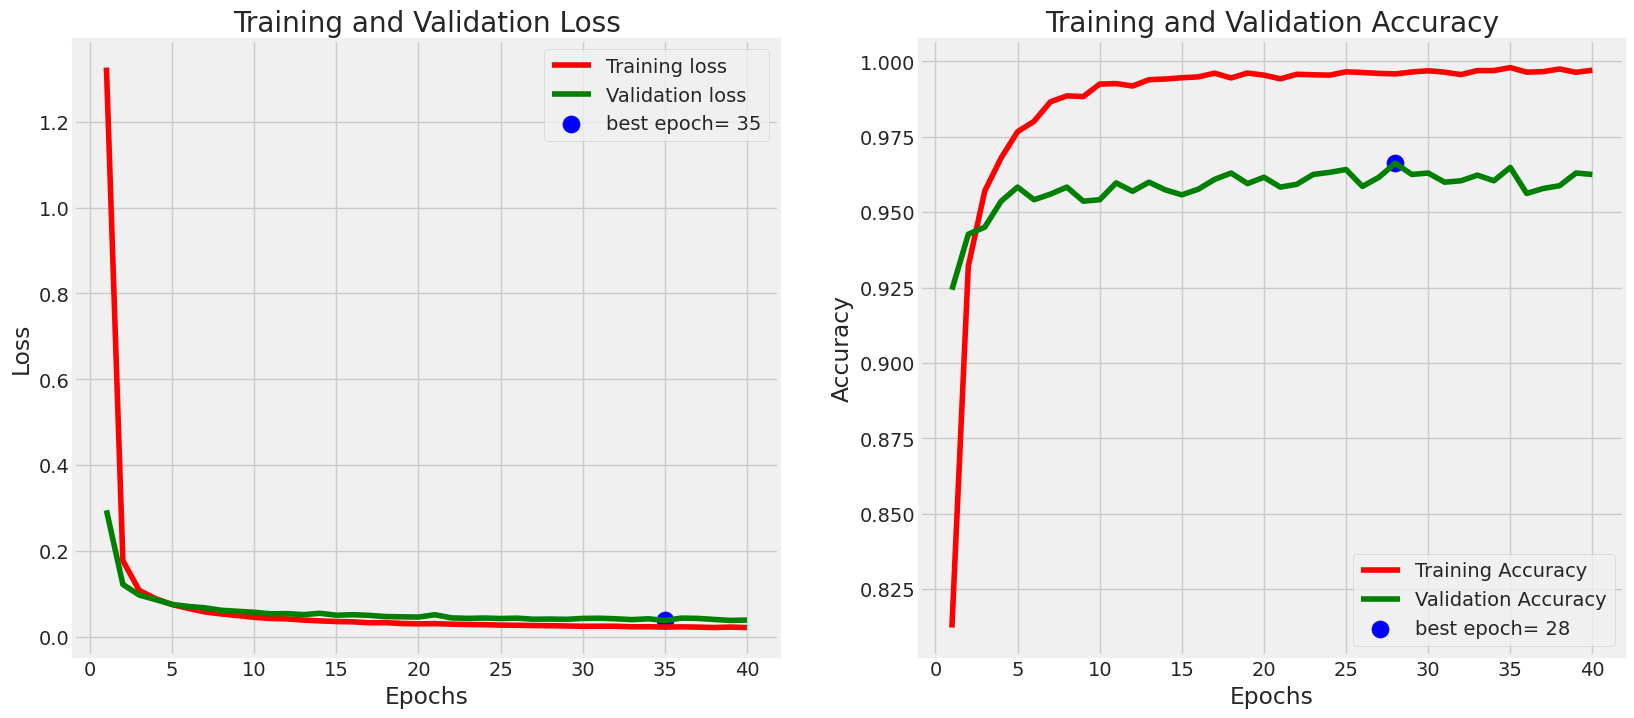

In [33]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [26]:
model.load_weights("/kaggle/working/eb3_poribohon_no_prunned.h5")
model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Apply custom focal loss
    metrics=['accuracy']
)

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

89/89 [==============================] - 72s 807ms/step - loss: 0.0267 - accuracy: 0.9846
--------------------
Validation Loss:  0.02458871155977249
Validation Accuracy:  0.9870084524154663
--------------------
Test Loss:  0.02672666311264038
Test Accuracy:  0.9845505356788635


In [34]:
model.load_weights("/kaggle/working/eb3_poribohon_no_prunned.h5")
model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Apply custom focal loss
    metrics=['accuracy']
)

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

89/89 [==============================] - 93s 1s/step - loss: 0.0358 - accuracy: 0.9663
--------------------
Validation Loss:  0.03892292454838753
Validation Accuracy:  0.966292142868042
--------------------
Test Loss:  0.03583374619483948
Test Accuracy:  0.966292142868042


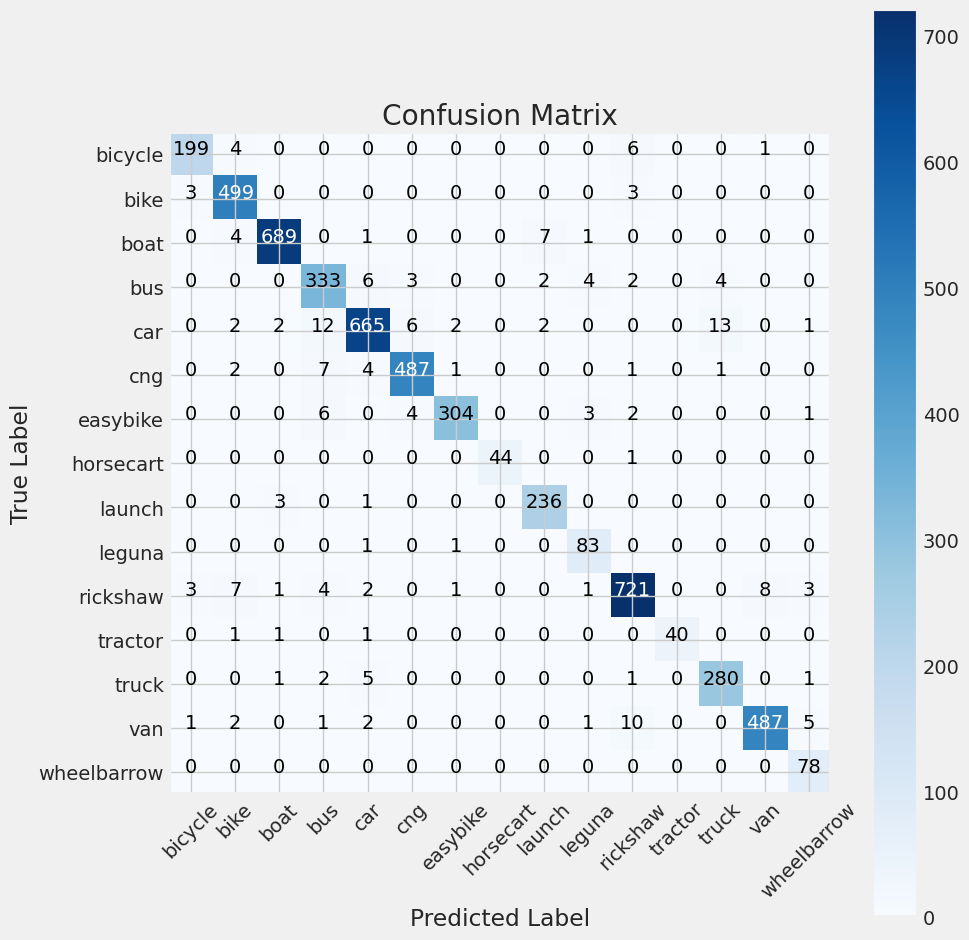

              precision    recall  f1-score   support

     bicycle       0.97      0.95      0.96       210
        bike       0.96      0.99      0.97       505
        boat       0.99      0.98      0.98       702
         bus       0.91      0.94      0.93       354
         car       0.97      0.94      0.95       705
         cng       0.97      0.97      0.97       503
    easybike       0.98      0.95      0.97       320
   horsecart       1.00      0.98      0.99        45
      launch       0.96      0.98      0.97       240
      leguna       0.89      0.98      0.93        85
    rickshaw       0.97      0.96      0.96       751
     tractor       1.00      0.93      0.96        43
       truck       0.94      0.97      0.95       290
         van       0.98      0.96      0.97       509
 wheelbarrow       0.88      1.00      0.93        78

    accuracy                           0.96      5340
   macro avg       0.96      0.96      0.96      5340
weighted avg       0.96   

In [35]:
# model.load_weights("/kaggle/working/eb3_20_9_24_simple_64.h5")
# model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [33]:
!pip install tensorflow-model-optimization

In [34]:
# import tensorflow_model_optimization as tfmot
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import tensorflow_addons as tfa
from tensorflow.keras.applications import EfficientNetB3, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
import tensorflow_model_optimization as tfmot
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Pruning configuration
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.30,  # Start pruning after 30% sparsity
        final_sparsity=0.80,    # End pruning at 80% sparsity
        begin_step=0,           # Start pruning at step 0
        end_step=2000           # End pruning after this many steps
    )
}

# Load the best pre-trained model from the checkpoint

# _shape` and `class_count` are already defined
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Build the model
best_model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128, kernel_regularizer=regularizers.l2(0.016), 
          activity_regularizer=regularizers.l1(0.006), 
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.15, seed=123),
    Dense(class_count, activation='softmax')  # Softmax for multiclass classification
])

# Compile the model with the custom focal loss for multiclass classification
# model.compile(
#     optimizer=Adamax(learning_rate=0.001), 
#     loss=focal_loss(gamma=2., alpha=0.25),  # Apply custom focal loss
#     metrics=['accuracy']
# )
# best_model = '/kaggle/working/eb3_20_9_24_new.h5'
best_model.load_weights("/kaggle/working/eb3_poribohon_no_prunned.h5")
best_model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Apply custom focal loss
    metrics=['accuracy']
)


In [36]:
# Apply pruning to the Dense layers of the loaded model
def apply_pruning_to_model(model):
    # Rebuild the model with pruning applied to the dense layers
    pruned_model = Sequential([
        model.layers[0],  # Retain the EfficientNet base model
        BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
        tfmot.sparsity.keras.prune_low_magnitude(Dense(64,  # Reduced for lightweight model
            kernel_regularizer=regularizers.l2(0.016),
            activity_regularizer=regularizers.l1(0.006),
            bias_regularizer=regularizers.l1(0.006), activation='relu'), **pruning_params),
        Dropout(rate=0.25, seed=123),  # Adjusted dropout
        Dense(class_count, activation='softmax')  # Softmax for multiclass classification
    ])
    return pruned_model

# Apply pruning to the loaded model
pruned_model = apply_pruning_to_model(best_model)

In [37]:
# Compile the pruned model
pruned_model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Use your custom focal loss function
    metrics=['accuracy']
)

In [46]:
# Define pruning callback
pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()
# Fine-tune or train the pruned model (you can skip this if not training further)
with tf.device('/GPU:0'):
    pruned_history = pruned_model.fit(
        x=train_gen,
        epochs=10,  # Fine-tune for a few epochs to adjust after pruning
        verbose=1,
        validation_data=valid_gen,
        shuffle=False,
        callbacks=[pruning_callback]
    )

# Strip pruning wrappers for final model export
final_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Save the pruned model
save_dir = '/kaggle/working/'
pruned_model_path = os.path.join(save_dir, 'eb3_pruned.h5')
final_pruned_model.save(pruned_model_path)
print(f"Pruned model saved at: {pruned_model_path}")


Epoch 1/10


2024-09-24 06:26:19.851410: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


537/537 [==============================] - 567s 950ms/step - loss: 0.4947 - accuracy: 0.9685 - val_loss: 0.0667 - val_accuracy: 0.9860
Epoch 2/10
537/537 [==============================] - 499s 929ms/step - loss: 0.0353 - accuracy: 0.9853 - val_loss: 0.0189 - val_accuracy: 0.9876
Epoch 3/10
537/537 [==============================] - 480s 894ms/step - loss: 0.0178 - accuracy: 0.9910 - val_loss: 0.0163 - val_accuracy: 0.9876
Epoch 4/10
537/537 [==============================] - 474s 883ms/step - loss: 0.0145 - accuracy: 0.9917 - val_loss: 0.0147 - val_accuracy: 0.9865
Epoch 5/10
537/537 [==============================] - 474s 881ms/step - loss: 0.0113 - accuracy: 0.9950 - val_loss: 0.0122 - val_accuracy: 0.9883
Epoch 6/10
537/537 [==============================] - 508s 945ms/step - loss: 0.0098 - accuracy: 0.9944 - val_loss: 0.0118 - val_accuracy: 0.9886
Epoch 7/10
537/537 [==============================] - 500s 930ms/step - loss: 0.0083 - accuracy: 0.9959 - val_loss: 0.0125 - val_accura

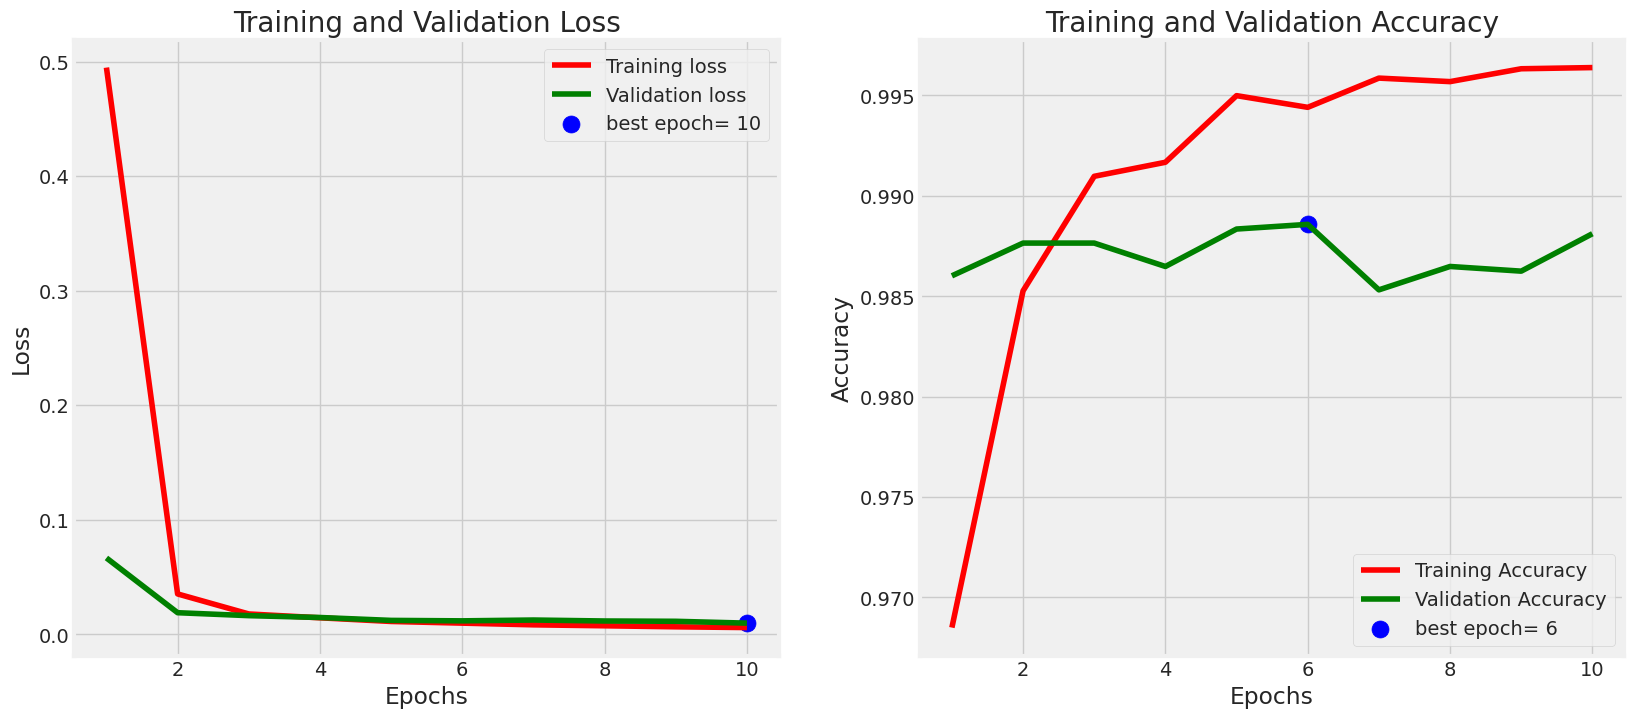

In [47]:
# Define needed variables
tr_acc = pruned_history.history['accuracy']
tr_loss = pruned_history.history['loss']
val_acc = pruned_history.history['val_accuracy']
val_loss = pruned_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [38]:
pruned_model_path='/kaggle/working/eb3_pruned.h5'
pruned_model = load_model(pruned_model_path)

# pruned_model.load_weights('/kaggle/working/eb3_pruned_final_20_9_24_new.h5')

# Compile the pruned model
pruned_model.compile(
    optimizer=Adamax(learning_rate=0.001), 
    loss=focal_loss(gamma=4., alpha=0.25),  # Use your custom focal loss function
    metrics=['accuracy']
)


In [39]:
pruned_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_8 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 64)                98368     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 15)                975       
                                                                 
Total params: 10889022 (41.54 MB)
Trainable params: 10

In [40]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = pruned_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = pruned_model.evaluate(test_gen, steps= test_steps, verbose= 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

89/89 [==============================] - 59s 656ms/step - loss: 0.0983 - accuracy: 0.9870
--------------------
Validation Loss:  0.09755555540323257
Validation Accuracy:  0.9873595237731934
--------------------
Test Loss:  0.09827658534049988
Test Accuracy:  0.9870084524154663


In [32]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = pruned_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = pruned_model.evaluate(test_gen, steps= test_steps, verbose= 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

89/89 [==============================] - 57s 634ms/step - loss: 0.0983 - accuracy: 0.9870
--------------------
Validation Loss:  0.09809544682502747
Validation Accuracy:  0.9873595237731934
--------------------
Test Loss:  0.09827658534049988
Test Accuracy:  0.9870084524154663


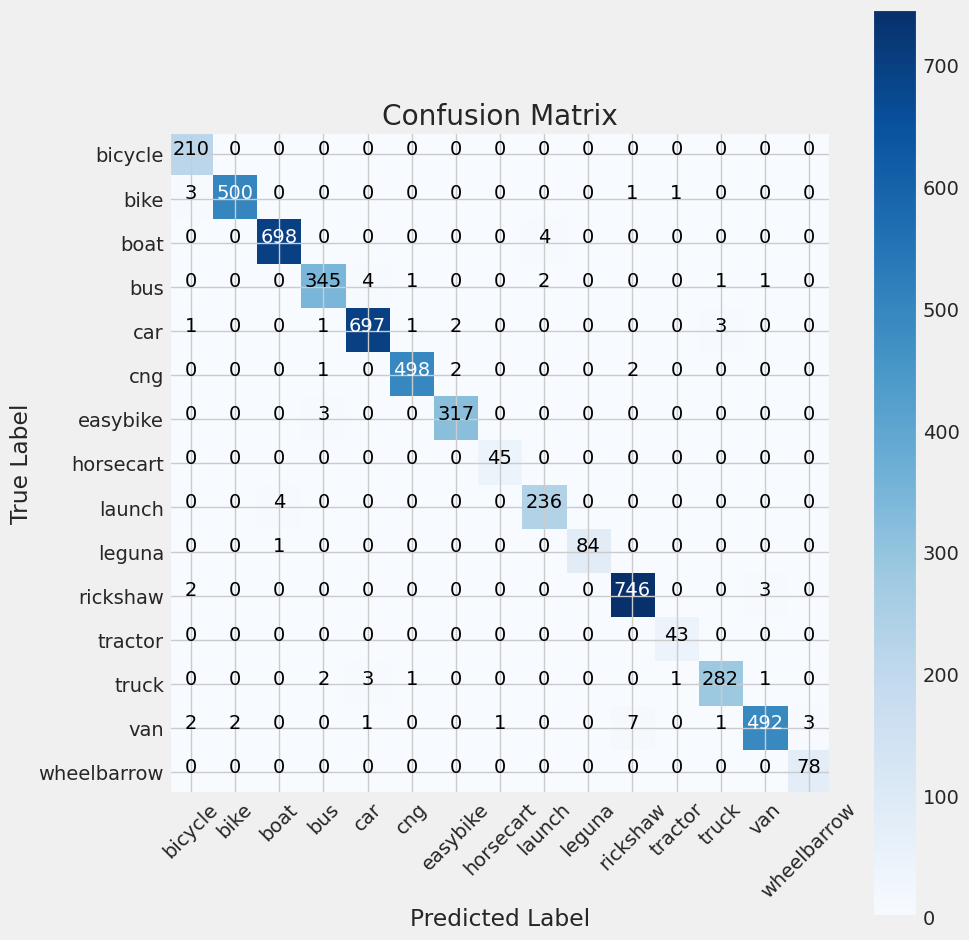

              precision    recall  f1-score   support

     bicycle       0.96      1.00      0.98       210
        bike       1.00      0.99      0.99       505
        boat       0.99      0.99      0.99       702
         bus       0.98      0.97      0.98       354
         car       0.99      0.99      0.99       705
         cng       0.99      0.99      0.99       503
    easybike       0.99      0.99      0.99       320
   horsecart       0.98      1.00      0.99        45
      launch       0.98      0.98      0.98       240
      leguna       1.00      0.99      0.99        85
    rickshaw       0.99      0.99      0.99       751
     tractor       0.96      1.00      0.98        43
       truck       0.98      0.97      0.98       290
         van       0.99      0.97      0.98       509
 wheelbarrow       0.96      1.00      0.98        78

    accuracy                           0.99      5340
   macro avg       0.98      0.99      0.99      5340
weighted avg       0.99   

In [51]:
preds = pruned_model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [30]:
# model.load_weights("/kaggle/working/eb3_20_9_24_poribohon.h5")
# model.compile(
#     optimizer=Adamax(learning_rate=0.001), 
#     loss=focal_loss(gamma=4., alpha=0.25),  # Apply custom focal loss
#     metrics=['accuracy']
# )

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/kaggle/working/eb3_20_9_24_poribohon.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [63]:
# base_model = tf.keras.applications.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

# model = Sequential([
#     base_model,
#     BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
#     Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
#                 bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
#     Dropout(rate= 0.15, seed= 123),
#     Dense(class_count, activation= 'softmax')
# ])



import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Multiply, GlobalAveragePooling2D, Input
from tensorflow.keras import regularizers, Model

# Input layer
input_layer = Input(shape=img_shape)

# Base model
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_tensor=input_layer, pooling=None)

# Global Average Pooling
x = GlobalAveragePooling2D()(base_model.output)

# Dense layer before attention
x = Dense(1024, activation='relu')(x)

# Attention mechanism
attention_probs = Dense(1024, activation='softmax', name='attention_probs')(x)
attention_mul = Multiply(name='attention_mul')([x, attention_probs])

# Batch Normalization
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(attention_mul)

# Dense layer with regularization
x = Dense(256, kernel_regularizer=regularizers.l2(l=0.016), 
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)

# Dropout layer
x = Dropout(rate=0.15, seed=123)(x)

# Output layer
output_layer = Dense(class_count, activation='softmax')(x)

# Model definition
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
train_df.to_csv('/kaggle/working/df_crop_train_filepaths.csv',index=False)
valid_df.to_csv('/kaggle/working/df_crop_valid_filepaths.csv',index=False)
test_df.to_csv('/kaggle/working/df_crop_test_filepaths.csv',index=False)

In [70]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Multiply, GlobalAveragePooling2D, Input, Add, Lambda
# from tensorflow.keras import regularizers, Model
# import tensorflow.keras.backend as K

# # Input layer
# input_layer = Input(shape=img_shape)

# # Base model
# base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_tensor=input_layer, pooling=None)

# # Global Average Pooling
# x = GlobalAveragePooling2D()(base_model.output)

# # Self-Attention Mechanism
# def self_attention(inputs):
#     # Compute the attention scores
#     attention_probs = Dense(1536, activation='softmax')(inputs)
    
#     # Compute the weighted sum of the inputs
#     attention_mul = Multiply()([inputs, attention_probs])
    
#     # Aggregate the results
#     attention_out = Add()([inputs, attention_mul])
#     return attention_out

# # Apply self-attention mechanism
# x = self_attention(x)

# # Batch Normalization
# x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

# # Dense layer with regularization
# x = Dense(256, kernel_regularizer=regularizers.l2(l=0.016), 
#           activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006), activation='relu')(x)

# # Dropout layer
# x = Dropout(rate=0.15, seed=123)(x)

# # Output layer
# output_layer = Dense(class_count, activation='softmax')(x)

# # Model definition
# model = Model(inputs=input_layer, outputs=output_layer)



In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint
save_dir = '/kaggle/working/'
filepath = os.path.join(save_dir, 'eb3_new_attention_all_poribohon_cropped.h5')
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=filepath,  # Filepath where the best weights will be saved
    save_best_only=True,                # Save only the best model based on the validation loss
    monitor='val_loss',                 # Monitor validation loss
    mode='min',                         # The model is saved when validation loss is minimized
    verbose=1                           # Print a message when saving the best model
)

# Compile the model
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 256, 256, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 256, 256, 3)          0         ['normalization_5[0][0]'

In [ ]:
# Train the model with the ModelCheckpoint callback
with tf.device('/GPU:0'):
    history = model.fit(
        x=train_gen,
        epochs=epochs,
        verbose=1,
        validation_data=valid_gen,
        validation_steps=None,
        shuffle=False,
        callbacks=[checkpoint_callback]  # Include the checkpoint callback in the training
    )


Epoch 1/30


2024-09-01 20:39:01.463748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


537/537 [==============================] - ETA: 0s - loss: 4.4207 - accuracy: 0.8712
Epoch 1: val_loss improved from inf to 1.87648, saving model to /kaggle/working/eb3_new_attention_all_poribohon_cropped.h5
537/537 [==============================] - 525s 873ms/step - loss: 4.4207 - accuracy: 0.8712 - val_loss: 1.8765 - val_accuracy: 0.9518
Epoch 2/30
537/537 [==============================] - ETA: 0s - loss: 1.1133 - accuracy: 0.9568
Epoch 2: val_loss improved from 1.87648 to 0.66627, saving model to /kaggle/working/eb3_new_attention_all_poribohon_cropped.h5
537/537 [==============================] - 472s 880ms/step - loss: 1.1133 - accuracy: 0.9568 - val_loss: 0.6663 - val_accuracy: 0.9578
Epoch 3/30
537/537 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.9722
Epoch 3: val_loss improved from 0.66627 to 0.44863, saving model to /kaggle/working/eb3_new_attention_all_poribohon_cropped.h5
537/537 [==============================] - 466s 868ms/step - loss: 0.4778 - 

In [28]:
# model.load_weights("/kaggle/working/best_model_weights.h5")

In [ ]:
# with tf.device('/GPU:0'):
#     history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
#                     validation_steps= None, shuffle= False)

In [ ]:
# model.save_weights("/kaggle/working/effb5_train_val_mixed.h5")

In [66]:
import pandas as pd

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Use the DataFrame's 'to_string' method to print the DataFrame in a tabular format
print(history_df.to_string())

        loss  accuracy  val_loss  val_accuracy
0   1.375971  0.824492  0.676783      0.943603
1   0.527981  0.941303  0.461693      0.945700
2   0.397721  0.961626  0.404777      0.949895
3   0.317383  0.974087  0.409388      0.944302
4   0.270090  0.980027  0.333909      0.962480
5   0.233590  0.985733  0.349512      0.954090
6   0.208337  0.988354  0.313643      0.958984
7   0.187669  0.990159  0.323534      0.959217
8   0.181652  0.988237  0.310306      0.958052
9   0.159641  0.992430  0.296511      0.961314
10  0.146757  0.993653  0.285217      0.962247
11  0.143024  0.993653  0.301878      0.959916
12  0.132969  0.994235  0.268383      0.967141
13  0.131157  0.994119  0.263001      0.966208
14  0.116848  0.995807  0.289649      0.959916
15  0.114662  0.995458  0.272634      0.962480
16  0.110495  0.995400  0.288860      0.962247
17  0.107063  0.996157  0.249466      0.964577
18  0.103992  0.995400  0.303445      0.957353
19  0.103399  0.995167  0.253494      0.964810
20  0.100387 

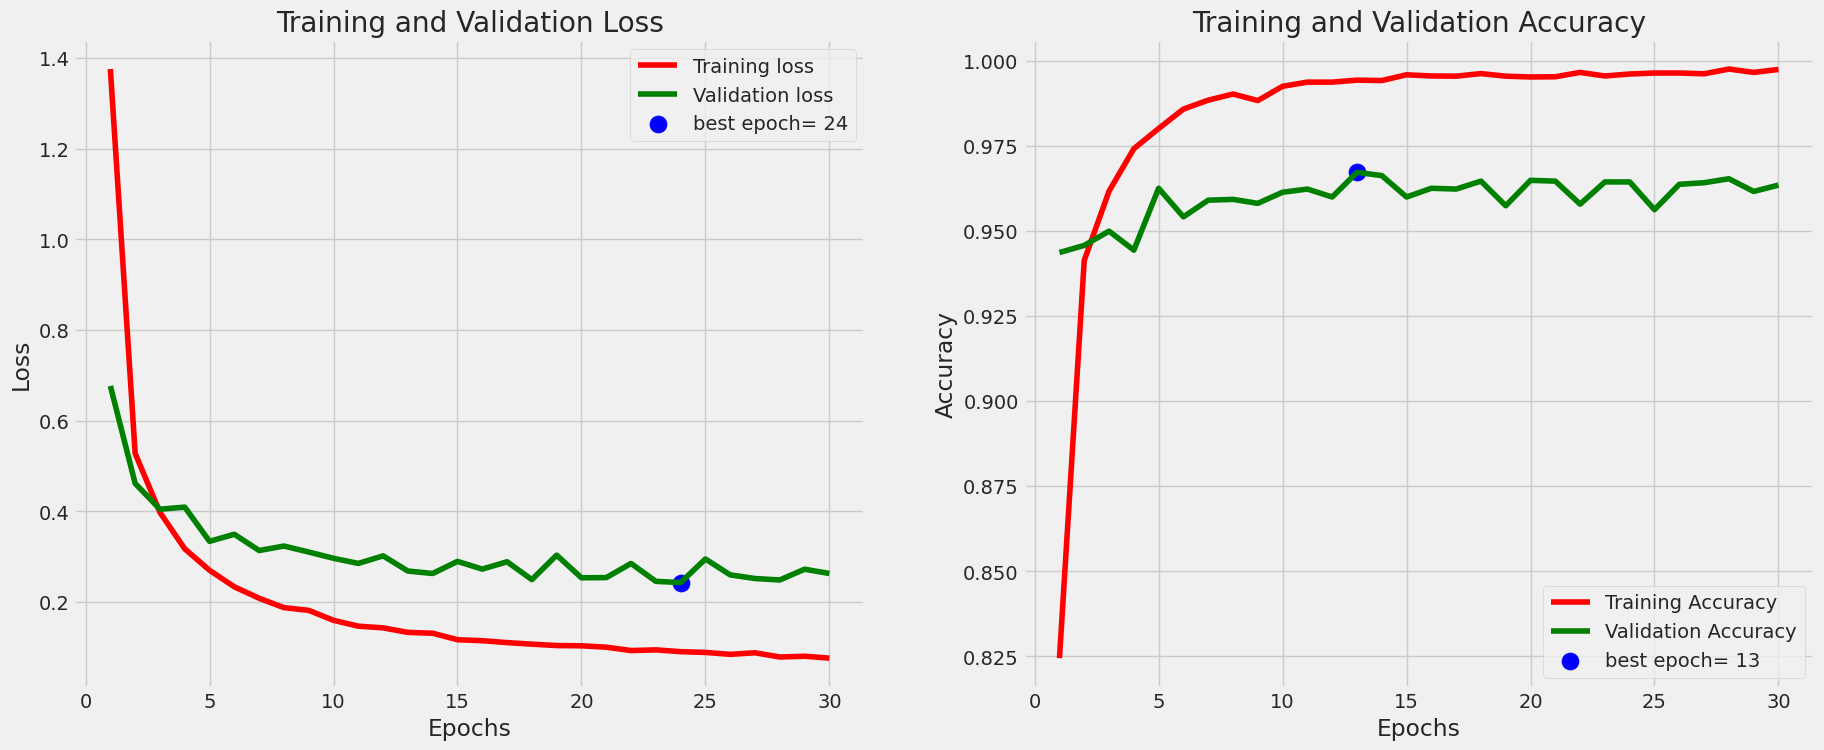

In [67]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [68]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

89/89 [==============================] - 65s 726ms/step - loss: 0.2706 - accuracy: 0.9624
Train Loss:  0.061385199427604675
Train Accuracy:  0.9996488690376282
--------------------
Validation Loss:  0.24947507679462433
Validation Accuracy:  0.966292142868042
--------------------
Test Loss:  0.27057167887687683
Test Accuracy:  0.9624297618865967


In [29]:
# ts_length = len(test_df)
# test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
# test_steps = ts_length // test_batch_size

# # train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
# valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
# test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

# # print("Train Loss: ", train_score[0])
# # print("Train Accuracy: ", train_score[1])
# print('-' * 20)
# print("Validation Loss: ", valid_score[0])
# print("Validation Accuracy: ", valid_score[1])
# print('-' * 20)
# print("Test Loss: ", test_score[0])
# print("Test Accuracy: ", test_score[1])

In [30]:
# print("Validation Loss: ", valid_score[0])
# print("Validation Accuracy: ", valid_score[1])
# print('-' * 20)
# print("Test Loss: ", test_score[0])
# print("Test Accuracy: ", test_score[1])

In [31]:
# test_gen.classes

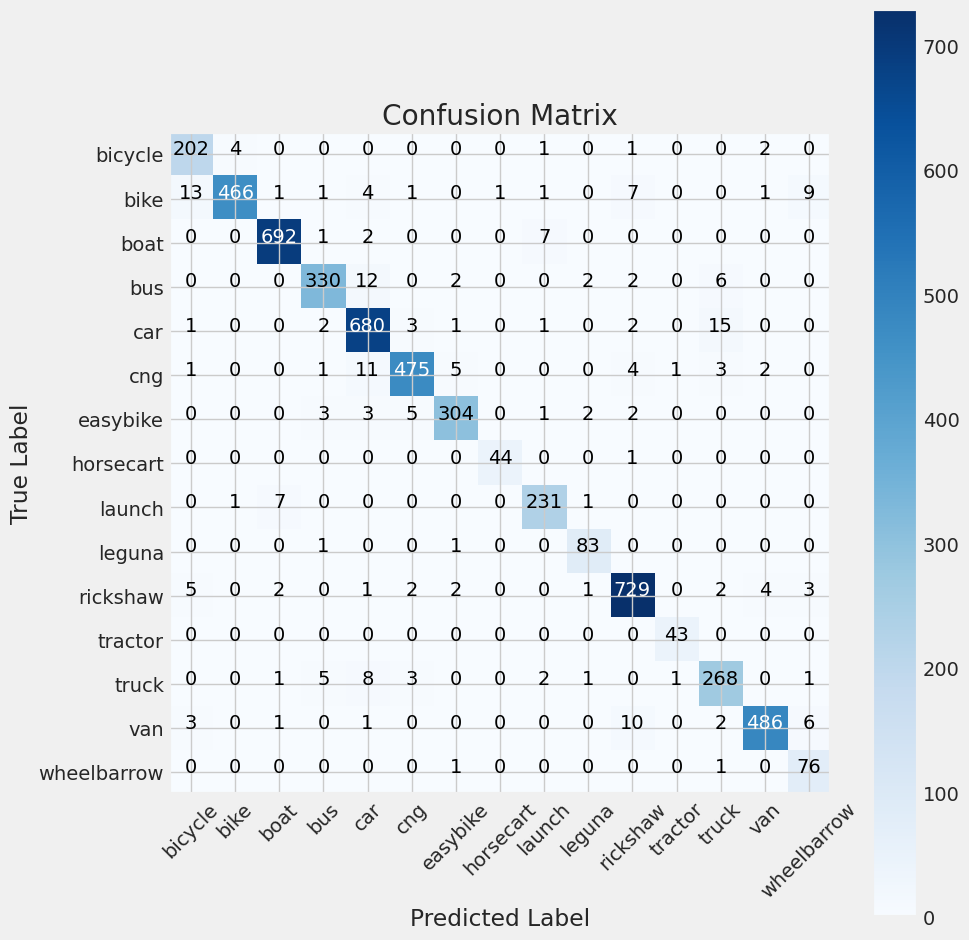

              precision    recall  f1-score   support

     bicycle       0.90      0.96      0.93       210
        bike       0.99      0.92      0.95       505
        boat       0.98      0.99      0.98       702
         bus       0.96      0.93      0.95       354
         car       0.94      0.96      0.95       705
         cng       0.97      0.94      0.96       503
    easybike       0.96      0.95      0.96       320
   horsecart       0.98      0.98      0.98        45
      launch       0.95      0.96      0.95       240
      leguna       0.92      0.98      0.95        85
    rickshaw       0.96      0.97      0.97       751
     tractor       0.96      1.00      0.98        43
       truck       0.90      0.92      0.91       290
         van       0.98      0.95      0.97       509
 wheelbarrow       0.80      0.97      0.88        78

    accuracy                           0.96      5340
   macro avg       0.94      0.96      0.95      5340
weighted avg       0.96   

In [56]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [34]:
train_df

filepaths     labels
1742  /kaggle/working/news/train/Tractor/tractor (12...    Tractor
6106  /kaggle/working/news/train/Bicycle/bicycle (23...    Bicycle
524   /kaggle/working/news/train/Bicycle/bicycle (38...    Bicycle
722      /kaggle/working/news/train/Bike/bike (774).jpg       Bike
681   /kaggle/working/news/train/Easy-bike/easybike ...  Easy-bike
...                                                 ...        ...
5218       /kaggle/working/news/train/Van/van (281).jpg        Van
4060  /kaggle/working/news/train/Easy-bike/easybike ...  Easy-bike
1346     /kaggle/working/news/train/Bike/bike (666).jpg       Bike
3454  /kaggle/working/news/train/Launch/launch (635)...     Launch
3582  /kaggle/working/news/train/Bicycle/bicycle (58...    Bicycle

[5797 rows x 2 columns]

In [35]:
valid_df

filepaths     labels
5356   /kaggle/working/news/train/Truck/truck (101).jpg      Truck
3021       /kaggle/working/news/train/Car/car (523).jpg        Car
1565       /kaggle/working/news/train/Car/car (557).jpg        Car
3293   /kaggle/working/news/train/Truck/truck (155).jpg      Truck
2822       /kaggle/working/news/train/Cng/cng (298).jpg        Cng
...                                                 ...        ...
4077     /kaggle/working/news/train/Bike/bike (339).jpg       Bike
5019  /kaggle/working/news/train/Tractor/tractor (34...    Tractor
3617     /kaggle/working/news/train/Bike/bike (619).jpg       Bike
3282  /kaggle/working/news/train/Easy-bike/easybike ...  Easy-bike
4664   /kaggle/working/news/train/Truck/truck (288).jpg      Truck

[1450 rows x 2 columns]

In [36]:
5797+1450

7247

In [38]:
7247+1803

9050

In [39]:
9050*.20

1810.0

In [46]:
1808/16

113.0

In [67]:

# Define a function to get predictions for all images in test_gen
def get_predictions(generator, model, filenames):
    all_predictions = []
    all_filepaths = []
    
    for i, (images, _) in enumerate(generator):
        preds = model.predict(images, verbose=0)
        all_predictions.extend(preds)
        batch_filepaths = filenames[i * generator.batch_size:(i + 1) * generator.batch_size]
        all_filepaths.extend(batch_filepaths)
        print(images)
        break
        
        if len(all_filepaths) >= generator.samples:
            break
    
    return np.array(all_predictions), all_filepaths

# Get filepaths from the test DataFrame
test_filepaths = ts_df['filepaths'].tolist()

# Get predictions
predictions, filepaths = get_predictions(test_gen, model, test_filepaths)

[[[[ 56.  65.  62.]
   [ 60.  66.  64.]
   [ 61.  65.  64.]
   ...
   [176. 198. 221.]
   [177. 199. 220.]
   [176. 199. 217.]]

  [[ 60.  66.  64.]
   [ 62.  68.  66.]
   [ 62.  68.  66.]
   ...
   [172. 196. 222.]
   [172. 196. 220.]
   [173. 198. 220.]]

  [[ 63.  67.  66.]
   [ 61.  67.  65.]
   [ 59.  68.  65.]
   ...
   [182. 203. 224.]
   [177. 198. 217.]
   [177. 198. 217.]]

  ...

  [[209. 204. 200.]
   [215. 216. 208.]
   [215. 216. 208.]
   ...
   [195. 199. 200.]
   [200. 199. 205.]
   [196. 189. 196.]]

  [[208. 203. 200.]
   [202. 202. 200.]
   [207. 207. 205.]
   ...
   [195. 195. 197.]
   [192. 193. 197.]
   [197. 198. 200.]]

  [[200. 196. 187.]
   [209. 210. 202.]
   [214. 215. 210.]
   ...
   [170. 168. 173.]
   [180. 178. 181.]
   [194. 196. 193.]]]


 [[[192. 197. 203.]
   [187. 192. 198.]
   [187. 192. 198.]
   ...
   [255. 255. 251.]
   [255. 255. 251.]
   [255. 255. 251.]]

  [[193. 198. 204.]
   [188. 193. 199.]
   [188. 193. 199.]
   ...
   [254. 254. 254.]
 

In [31]:
base_model = tf.keras.applications.MobileNetV3Large(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.15, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 960)               2996352   
 al)                                                             
                                                                 
 batch_normalization_3 (Bat  (None, 960)               3840      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               246016    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 196)               50372     
                                                                 
Total params: 3296580 (12.58 MB)
Trainable params: 327

In [32]:
with tf.device('/GPU:0'):
    history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/30
204/204 [==============================] - 66s 193ms/step - loss: 10.4098 - accuracy: 0.0617 - val_loss: 9.3153 - val_accuracy: 0.0454
Epoch 2/30
204/204 [==============================] - 38s 187ms/step - loss: 6.7848 - accuracy: 0.4172 - val_loss: 6.6846 - val_accuracy: 0.2394
Epoch 3/30
204/204 [==============================] - 37s 179ms/step - loss: 4.7303 - accuracy: 0.7101 - val_loss: 5.3043 - val_accuracy: 0.3898
Epoch 4/30
204/204 [==============================] - 35s 173ms/step - loss: 3.4189 - accuracy: 0.8608 - val_loss: 4.3453 - val_accuracy: 0.5132
Epoch 5/30
204/204 [==============================] - 36s 175ms/step - loss: 2.5614 - accuracy: 0.9498 - val_loss: 3.6753 - val_accuracy: 0.5856
Epoch 6/30
204/204 [==============================] - 35s 169ms/step - loss: 2.0117 - accuracy: 0.9804 - val_loss: 3.2785 - val_accuracy: 0.6255
Epoch 7/30
204/204 [==============================] - 38s 184ms/step - loss: 1.6549 - accuracy: 0.9913 - val_loss: 2.9796 - val_a

In [33]:
import pandas as pd

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Use the DataFrame's 'to_string' method to print the DataFrame in a tabular format
print(history_df.to_string())

         loss  accuracy  val_loss  val_accuracy
0   10.409834  0.061704  9.315265      0.045427
1    6.784763  0.417191  6.684602      0.239411
2    4.730302  0.710054  5.304263      0.389810
3    3.418917  0.860783  4.345258      0.513198
4    2.561361  0.949808  3.675330      0.585635
5    2.011721  0.980353  3.278524      0.625537
6    1.654893  0.991251  2.979637      0.654389
7    1.404543  0.995088  2.824409      0.644567
8    1.236519  0.996470  2.783046      0.639656
9    1.103493  0.997391  2.506046      0.691222
10   1.005235  0.997544  2.419239      0.688152
11   0.919495  0.998005  2.360446      0.688152
12   0.846569  0.998005  2.263181      0.688766
13   0.786171  0.997544  2.246130      0.685697
14   0.732268  0.997851  2.132456      0.696133
15   0.685615  0.997544  2.068279      0.709638
16   0.644796  0.997391  1.994721      0.704113
17   0.605037  0.997391  1.993841      0.710252
18   0.570469  0.998005  2.000507      0.701044
19   0.535264  0.998158  1.890190      0

In [34]:
model.save_weights("/kaggle/working/mvnet_stanfrd.h5")

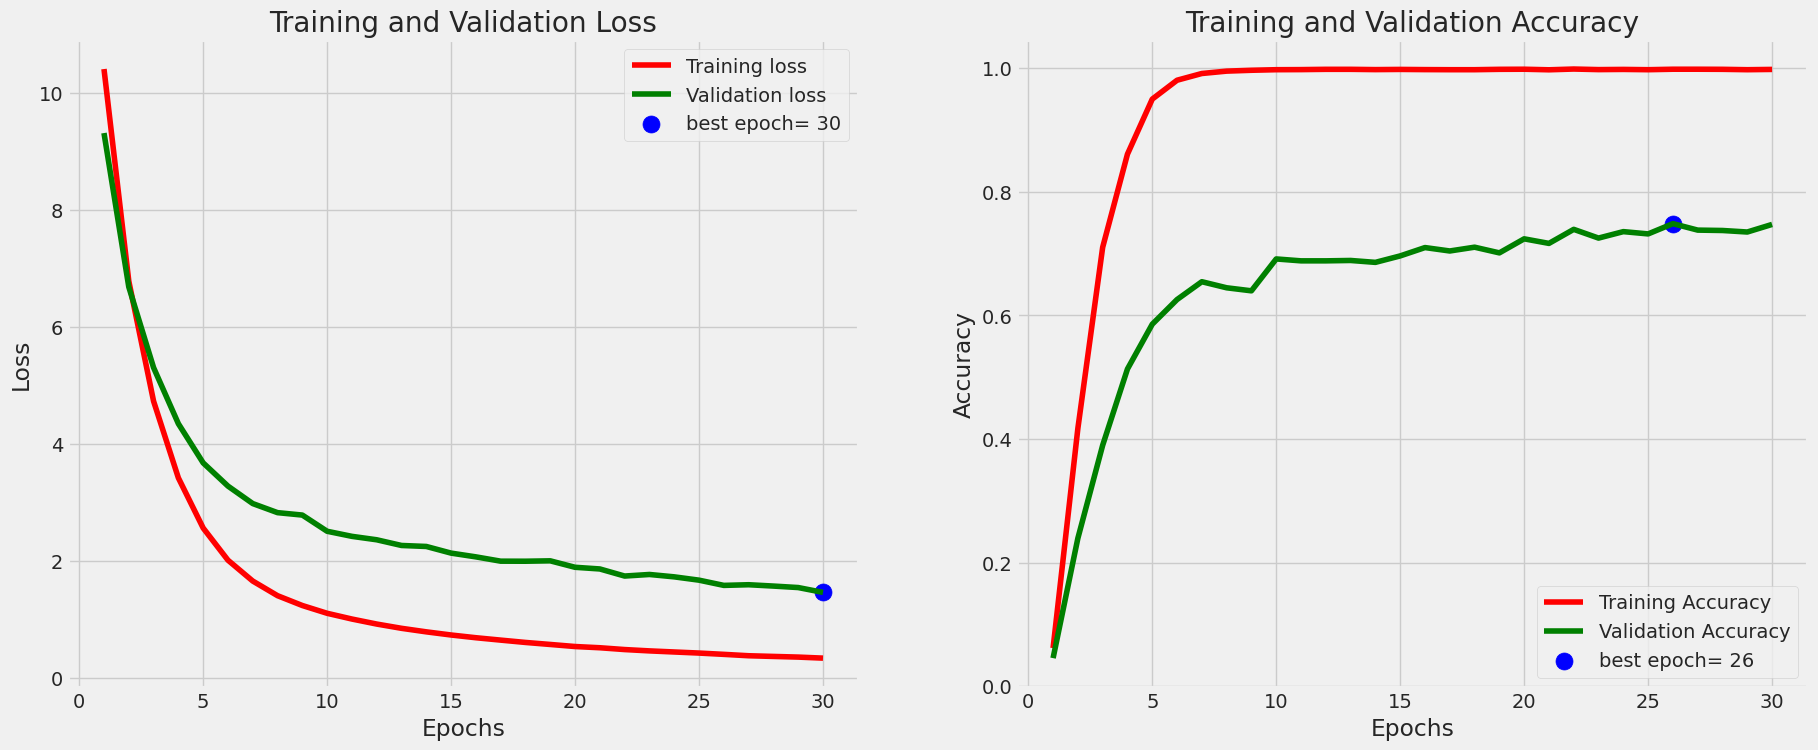

In [35]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [53]:
ts_length = len(ts_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

187/187 [==============================] - 26s 137ms/step - loss: 1.4631 - accuracy: 0.7517
Train Loss:  0.31376975774765015
Train Accuracy:  0.9986631274223328
--------------------
Validation Loss:  1.4608278274536133
Validation Accuracy:  0.7470840811729431
--------------------
Test Loss:  1.463133454322815
Test Accuracy:  0.7516711354255676


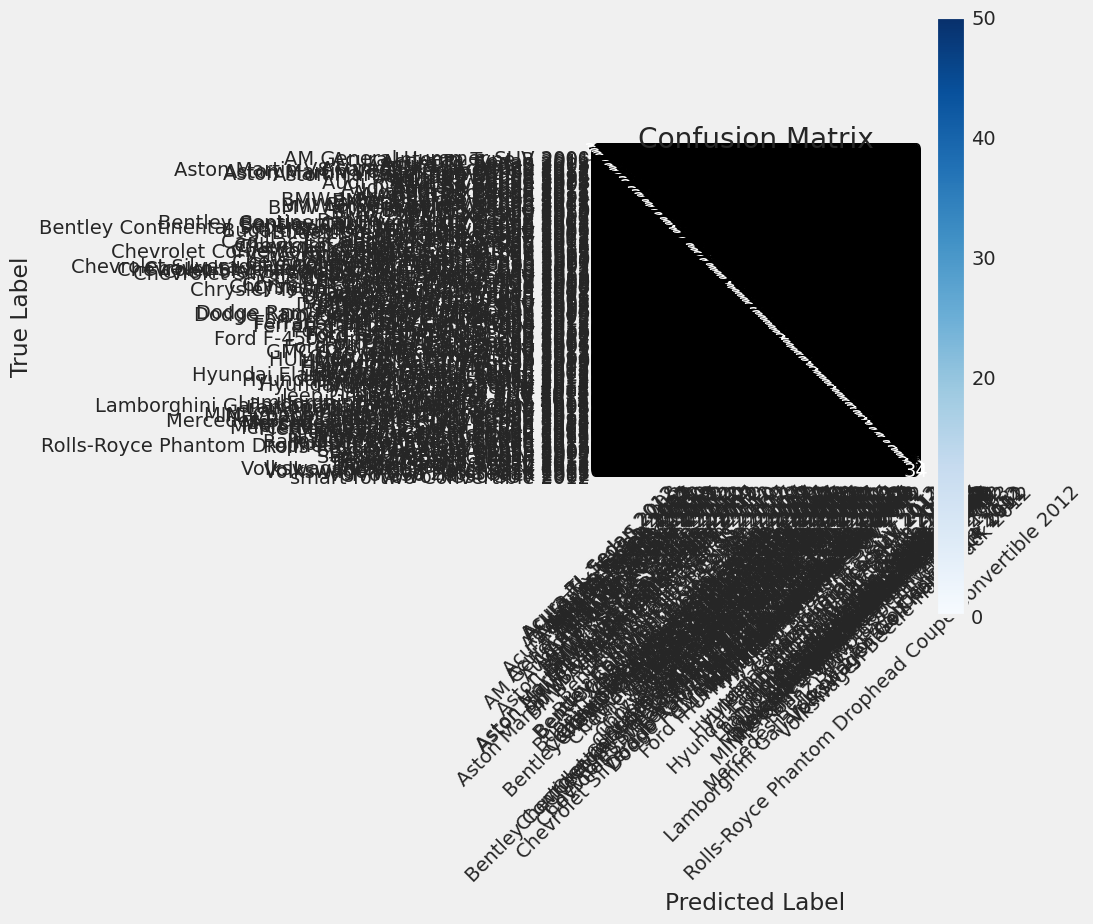

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.83      0.89      0.86        44
                             Acura Integra Type R 2001       0.77      0.84      0.80        44
                                   Acura RL Sedan 2012       0.63      0.59      0.61        32
                                   Acura TL Sedan 2012       0.93      0.86      0.89        43
                                  Acura TL Type-S 2008       0.91      0.74      0.82        42
                                  Acura TSX Sedan 2012       0.74      0.70      0.72        40
                              Acura ZDX Hatchback 2012       0.65      0.67      0.66        39
              Aston Martin V8 Vantage Convertible 2012       0.45      0.53      0.49        45
                    Aston Martin V8 Vantage Coupe 2012       0.56      0.44      0.49        41
                  Aston Martin Virage C

In [37]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [43]:
ts_df

filepaths  \
0     /kaggle/working/stanford/test/Land Rover Range...   
1     /kaggle/working/stanford/test/smart fortwo Con...   
2     /kaggle/working/stanford/test/Ford E-Series Wa...   
3     /kaggle/working/stanford/test/Acura TSX Sedan ...   
4     /kaggle/working/stanford/test/BMW X6 SUV 2012/...   
...                                                 ...   
8036  /kaggle/working/stanford/test/Dodge Challenger...   
8037  /kaggle/working/stanford/test/Aston Martin V8 ...   
8038  /kaggle/working/stanford/test/Jeep Wrangler SU...   
8039  /kaggle/working/stanford/test/Hyundai Accent S...   
8040  /kaggle/working/stanford/test/Audi S5 Coupe 20...   

                                  labels  
0        Land Rover Range Rover SUV 2012  
1          smart fortwo Convertible 2012  
2           Ford E-Series Wagon Van 2012  
3                   Acura TSX Sedan 2012  
4                        BMW X6 SUV 2012  
...                                  ...  
8036          Dodge Challenger SRT8 2011  
8037  Aston Martin V8 Vantage Coupe 2012  
8038              Jeep Wrangler SUV 2012  
8039           Hyundai Accent Sedan 2012  
8040                  Audi S5 Coupe 2012  

[8041 rows x 2 columns]

In [46]:
ts_df['filepaths'][0]

'/kaggle/working/stanford/test/Land Rover Range Rover SUV 2012/02766.jpg'

In [49]:
class_labels

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [59]:
predicted_labels[0]

'Aston Martin Virage Coupe 2012'

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class indices and labels
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []
d=[]
# Iterate through each image in the test dataframe
for i in range(len(ts_df)):
    # Load and preprocess the image
    img_path = ts_df.iloc[i]['filepaths']
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the probabilities for the image
    prediction = model.predict(img_array)
    prediction = prediction[0]  # Get the prediction for this single image
    
    # Get the true class label from the DataFrame
    true_class_label = ts_df.iloc[i]['labels']
    
    # Get the final predicted class
    final_class_index = prediction.argmax()
    final_class_label = class_labels[final_class_index]
    
    # Append true and predicted labels to the lists
    true_labels.append(true_class_label)
    predicted_labels.append(final_class_label)
    d.append([img_path,true_class_label,final_class_label])

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


1/1 [==============================] - 0s 21ms/step
                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.00      0.00      0.00        44
                             Acura Integra Type R 2001       0.00      0.00      0.00        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        32
                                   Acura TL Sedan 2012       0.00      0.00      0.00        43
                                  Acura TL Type-S 2008       0.00      0.00      0.00        42
                                  Acura TSX Sedan 2012       0.00      0.00      0.00        40
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.

In [69]:
import numpy as np
import pandas as pd

# Define a function to get predictions, true labels, and file paths from the generator
def get_predictions_and_labels(generator, model, true_labels):
    all_predictions = []
    all_filepaths = []
    all_true_labels = []
    
    for i in range(len(generator)):
        images, labels = next(generator)  # Get the next batch of images and labels
        preds = model.predict(images, verbose=0)
        batch_filepaths = generator.filenames[i * generator.batch_size:(i + 1) * generator.batch_size]
        batch_true_labels = true_labels[i * generator.batch_size:(i + 1) * generator.batch_size]
        
        all_predictions.extend(preds)
        all_filepaths.extend(batch_filepaths)
        all_true_labels.extend(batch_true_labels)
        
        if len(all_filepaths) >= generator.samples:
            break
    
    return np.array(all_predictions), all_true_labels, all_filepaths

# Get true labels from the test DataFrame
test_true_labels = ts_df['labels'].tolist()  # Ensure this matches the format used in the generator

# Ensure generator is configured without shuffling
test_gen = ts_gen.flow_from_dataframe(ts_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

# Get predictions, true labels, and file paths
predictions, true_labels, filepaths = get_predictions_and_labels(test_gen, model, test_true_labels)

# Convert predictions and true labels to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)

# Create a DataFrame with results
results_df = pd.DataFrame({
    'filepaths': filepaths,
    'true_labels': [classes[c] for c in true_classes],
    'predicted_labels': [classes[c] for c in predicted_classes],
    'predicted_probabilities': [list(pred) for pred in predictions]  # List of probabilities for each class
})

# Print the results
print(results_df.head())

# Save the results to a CSV file if needed
results_df.to_csv('test_results.csv', index=False)


Found 8041 validated image filenames belonging to 196 classes.


AxisError: axis 1 is out of bounds for array of dimension 1

In [57]:
true_labels[0]

'Land Rover Range Rover SUV 2012'

In [58]:
class_labels

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [56]:
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

['/kaggle/working/stanford/test/Land Rover Range Rover SUV 2012/02766.jpg',
 'Land Rover Range Rover SUV 2012',
 'Aston Martin Virage Coupe 2012']

In [60]:
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.00      0.00      0.00        44
                             Acura Integra Type R 2001       0.00      0.00      0.00        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        32
                                   Acura TL Sedan 2012       0.00      0.00      0.00        43
                                  Acura TL Type-S 2008       0.00      0.00      0.00        42
                                  Acura TSX Sedan 2012       0.00      0.00      0.00        40
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.00        41
                  Aston Martin Virage C

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
label_encoder = LabelEncoder()


label_encoder.fit(class_labels)

# Encode labels
true_labels_encoded = label_encoder.transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# Get class names
class_names = label_encoder.classes_
report = classification_report(true_labels_encoded, predicted_labels_encoded, target_names=class_names)
print(report)

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.00      0.00      0.00        44
                             Acura Integra Type R 2001       0.00      0.00      0.00        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        32
                                   Acura TL Sedan 2012       0.00      0.00      0.00        43
                                  Acura TL Type-S 2008       0.00      0.00      0.00        42
                                  Acura TSX Sedan 2012       0.00      0.00      0.00        40
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.00        41
                  Aston Martin Virage C

In [65]:
correct_predictions = sum(t == p for t, p in zip(true_labels, predicted_labels))

# Output the number of correct predictions
print(f"Number of correct predictions: {correct_predictions}")

Number of correct predictions: 38


1/1 [==============================] - 0s 21ms/step
/kaggle/working/stanford/test/Aston Martin Virage Coupe 2012/01075.jpg


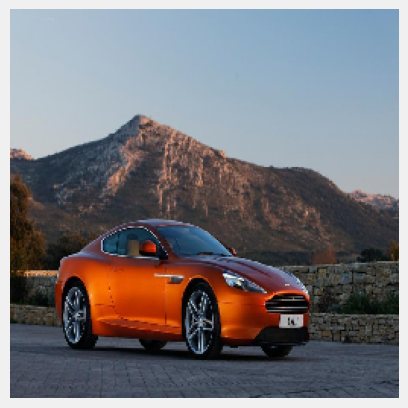

True Class: Aston Martin Virage Coupe 2012
Probability of Aston Martin Virage Coupe 2012: 0.2074
Final Predicted Class: Aston Martin Virage Coupe 2012 with probability 0.2074



In [52]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Get the class indices and labels
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

# Iterate through each image in the test dataframe
for i in range(len(ts_df)):
    # Load and preprocess the image
    img_path = ts_df.iloc[i]['filepaths']
#     print(img_path)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the probabilities for the image
    prediction = model.predict(img_array)
    prediction = prediction[0]  # Get the prediction for this single image
    
    # Get the true class label from the DataFrame
    true_class_label = ts_df.iloc[i]['labels']
    
    # Get the final predicted class
    final_class_index = prediction.argmax()
    final_class_label = class_labels[final_class_index]
    
    # Check if the prediction is correct
    if final_class_label == true_class_label:
        # Display the image
        print(img_path)
        plt.imshow(image.img_to_array(img) / 255.0)
        plt.axis('off')
        plt.show()
        
        # Print the probability for the correct class
        print(f"True Class: {true_class_label}")
        print(f"Probability of {true_class_label}: {prediction[final_class_index]:.4f}")
        print(f"Final Predicted Class: {final_class_label} with probability {prediction[final_class_index]:.4f}\n")
        break


/kaggle/working/stanford/test/Land Rover Range Rover SUV 2012/02766.jpg


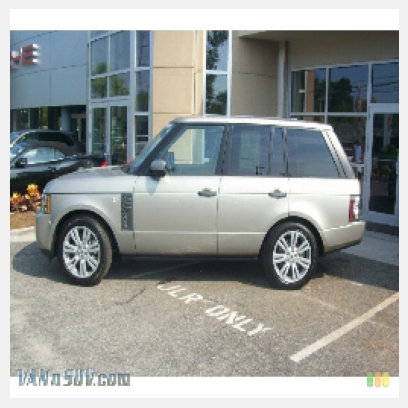

True Class: AM General Hummer SUV 2000
Probability of AM General Hummer SUV 2000: 0.0023
Probability of Acura Integra Type R 2001: 0.0010
Probability of Acura RL Sedan 2012: 0.0111
Probability of Acura TL Sedan 2012: 0.0038
Probability of Acura TL Type-S 2008: 0.0036
Probability of Acura TSX Sedan 2012: 0.0183
Probability of Acura ZDX Hatchback 2012: 0.0060
Probability of Aston Martin V8 Vantage Convertible 2012: 0.0045
Probability of Aston Martin V8 Vantage Coupe 2012: 0.0013
Probability of Aston Martin Virage Convertible 2012: 0.0043
Probability of Aston Martin Virage Coupe 2012: 0.0020
Probability of Audi 100 Sedan 1994: 0.0040
Probability of Audi 100 Wagon 1994: 0.0901
Probability of Audi A5 Coupe 2012: 0.0017
Probability of Audi R8 Coupe 2012: 0.0010
Probability of Audi RS 4 Convertible 2008: 0.0031
Probability of Audi S4 Sedan 2007: 0.0014
Probability of Audi S4 Sedan 2012: 0.0021
Probability of Audi S5 Convertible 2012: 0.0025
Probability of Audi S5 Coupe 2012: 0.0012
Probabilit

In [42]:
# import matplotlib.pyplot as plt
# import numpy as np
# from tensorflow.keras.preprocessing import image

# # Generate predictions
# predictions = model.predict(test_gen, verbose=1)

# # Get the class indices
# class_indices = train_gen.class_indices
# class_labels = list(class_indices.keys())

# Iterate through the predictions and display the image along with the probabilities and true class
for i, prediction in enumerate(predictions):
    # Load the image
    img_path = ts_df.iloc[i]['filepaths']
    print(img_path)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    
    # Display the image
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()
    
    # Get the true class label
    true_class_index = np.argmax(ts_df.iloc[i]['labels'])
    true_class_label = class_labels[true_class_index]
    
    # Print the probability for each class
    print(f"True Class: {true_class_label}")
    for j, class_label in enumerate(class_labels):
        print(f"Probability of {class_label}: {prediction[j]:.4f}")
    
    # Get the final predicted class
    final_class_index = prediction.argmax()
    final_class_label = class_labels[final_class_index]
    final_probability = prediction[final_class_index]
    
    print(f"Final Predicted Class: {final_class_label} with probability {final_probability:.4f}\n")
    break


In [ ]:
base_model = tf.keras.applications.(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.15, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

In [41]:
import pandas as pd

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Use the DataFrame's 'to_string' method to print the DataFrame in a tabular format
print(history_df.to_string())

        loss  accuracy  val_loss  val_accuracy
0   7.372391  0.838450  6.068800      0.956422
1   5.052527  0.970158  4.287380      0.974771
2   3.692291  0.987948  3.132839      0.981651
3   2.707714  0.992539  2.304790      0.983945
4   2.003336  0.995122  1.700384      0.983945
5   1.471348  0.998278  1.268723      0.983945
6   1.095181  0.997131  0.948452      0.983945
7   0.818708  0.998565  0.723302      0.981651
8   0.632694  0.997991  0.571205      0.983945
9   0.501874  0.999139  0.462747      0.987385
10  0.408302  0.998852  0.389030      0.983945
11  0.350679  0.999426  0.342666      0.988532
12  0.309612  0.997991  0.300725      0.987385
13  0.274361  0.999426  0.282014      0.987385
14  0.259263  0.999426  0.276684      0.985092
15  0.238980  1.000000  0.251228      0.986239
16  0.225027  0.999713  0.238959      0.989679
17  0.216163  0.999713  0.233404      0.990826
18  0.209633  0.999713  0.243835      0.987385
19  0.201827  0.999713  0.235216      0.986239
20  0.199341 

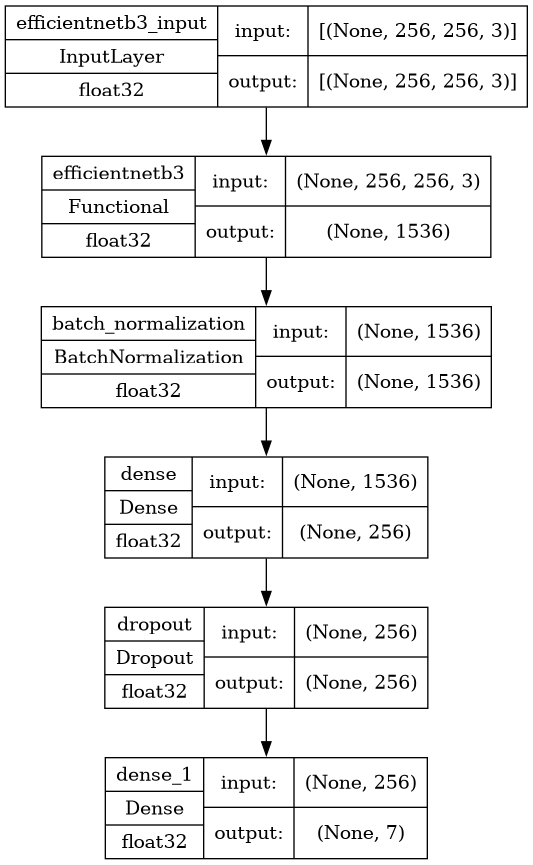

In [22]:
!pip install pydot graphviz

# Import necessary modules
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from IPython.display import Image

model_visual = models.Model(inputs=model.input, outputs=model.output)

# Save model architecture to a file
plot_model(model_visual, show_dtype=True, to_file='efficientnetb3_model_architecture.png', show_shapes=True)

# Display model architecture in the notebook
Image(retina=True, filename='efficientnetb3_model_architecture.png')

In [ ]:
!pip install visualkeras

In [ ]:
from visualkeras import layered_view
# Visualize the model
layered_view(model, legend=True, max_xy=600)

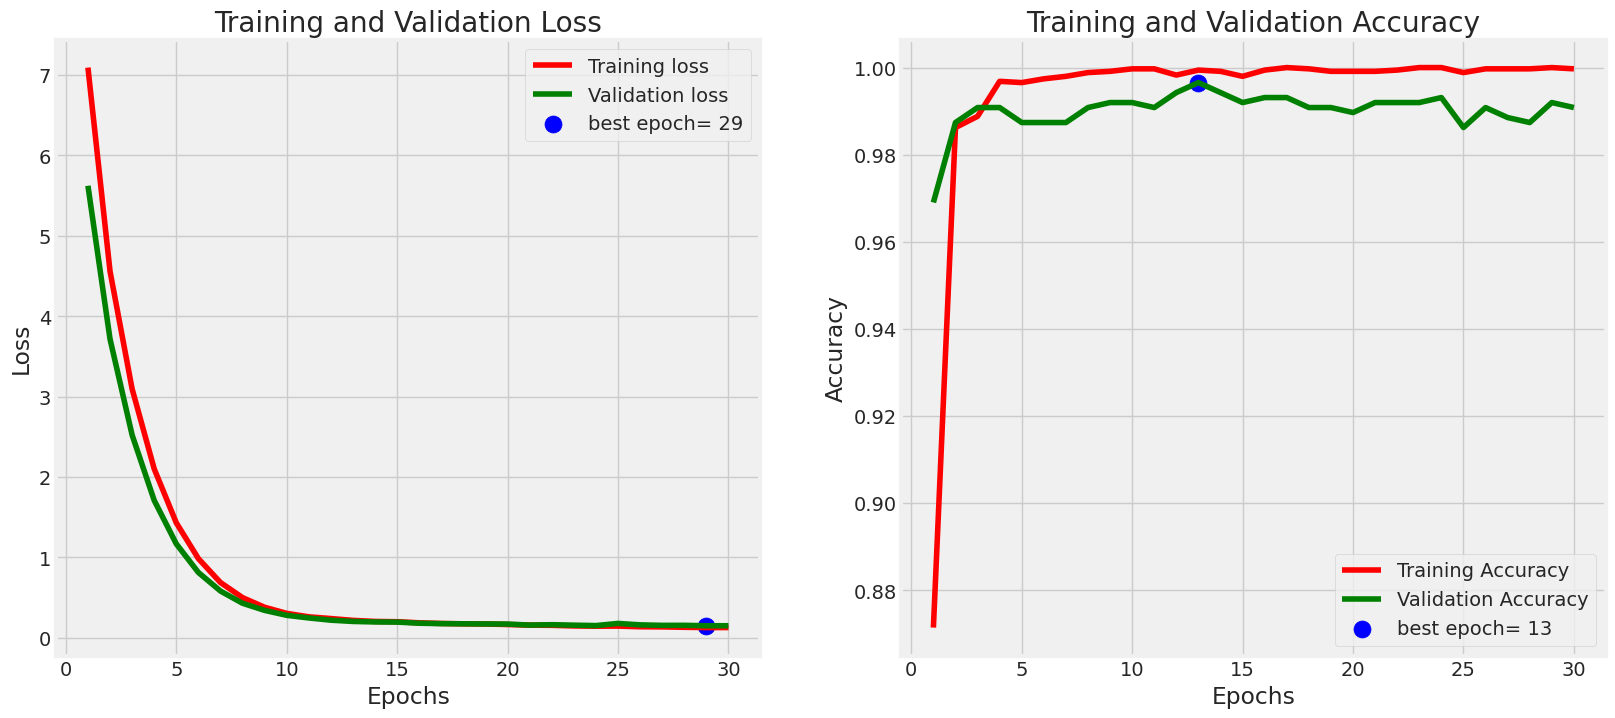

In [24]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [25]:
ts_length = len(ts_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

137/137 [==============================] - 12s 83ms/step - loss: 0.3037 - accuracy: 0.9547
Train Loss:  0.11201492697000504
Train Accuracy:  1.0
--------------------
Validation Loss:  0.1513855755329132
Validation Accuracy:  0.9908257126808167
--------------------
Test Loss:  0.30367428064346313
Test Accuracy:  0.9547445178031921


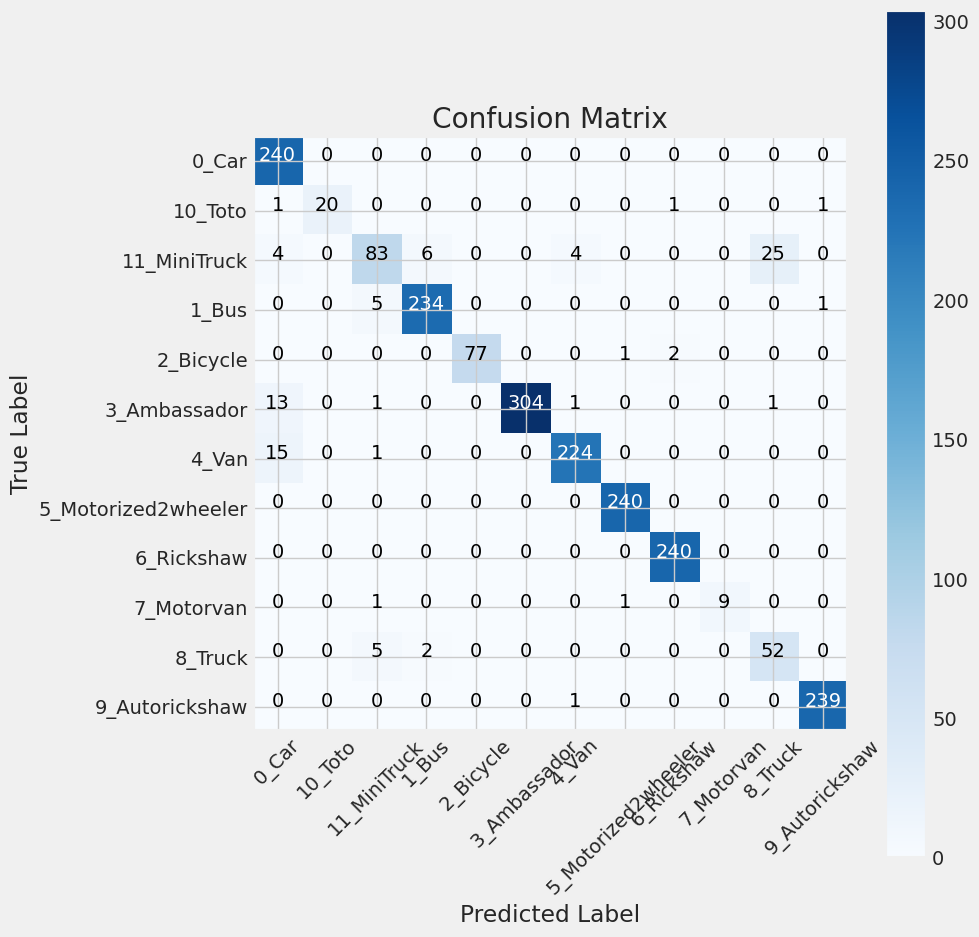

                     precision    recall  f1-score   support

              0_Car       0.88      1.00      0.94       240
            10_Toto       1.00      0.87      0.93        23
       11_MiniTruck       0.86      0.68      0.76       122
              1_Bus       0.97      0.97      0.97       240
          2_Bicycle       1.00      0.96      0.98        80
       3_Ambassador       1.00      0.95      0.97       320
              4_Van       0.97      0.93      0.95       240
5_Motorized2wheeler       0.99      1.00      1.00       240
         6_Rickshaw       0.99      1.00      0.99       240
         7_Motorvan       1.00      0.82      0.90        11
            8_Truck       0.67      0.88      0.76        59
     9_Autorickshaw       0.99      1.00      0.99       240

           accuracy                           0.95      2055
          macro avg       0.94      0.92      0.93      2055
       weighted avg       0.96      0.95      0.95      2055



In [26]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [29]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/30


2024-08-12 08:31:56.472602: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


204/204 [==============================] - 192s 679ms/step - loss: 10.7795 - accuracy: 0.0723 - val_loss: 8.4428 - val_accuracy: 0.2001
Epoch 2/30
204/204 [==============================] - 136s 664ms/step - loss: 6.6678 - accuracy: 0.4304 - val_loss: 5.6382 - val_accuracy: 0.4831
Epoch 3/30
204/204 [==============================] - 136s 665ms/step - loss: 4.2582 - accuracy: 0.7363 - val_loss: 3.9859 - val_accuracy: 0.6403
Epoch 4/30
204/204 [==============================] - 136s 666ms/step - loss: 2.8473 - accuracy: 0.8998 - val_loss: 3.1231 - val_accuracy: 0.7060
Epoch 5/30
204/204 [==============================] - 136s 664ms/step - loss: 2.0610 - accuracy: 0.9552 - val_loss: 2.5296 - val_accuracy: 0.7545
Epoch 6/30
204/204 [==============================] - 136s 665ms/step - loss: 1.5928 - accuracy: 0.9820 - val_loss: 2.2269 - val_accuracy: 0.7716
Epoch 7/30
204/204 [==============================] - 136s 665ms/step - loss: 1.3290 - accuracy: 0.9908 - val_loss: 2.0196 - val_accur

In [30]:
import pandas as pd

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Use the DataFrame's 'to_string' method to print the DataFrame in a tabular format
print(history_df.to_string())

         loss  accuracy  val_loss  val_accuracy
0   10.779510  0.072295  8.442819      0.200123
1    6.667792  0.430391  5.638203      0.483118
2    4.258243  0.736301  3.985909      0.640270
3    2.847286  0.899770  3.123121      0.705955
4    2.061023  0.955180  2.529642      0.754451
5    1.592828  0.982041  2.226918      0.771639
6    1.329021  0.990790  2.019620      0.785758
7    1.149173  0.994628  1.887013      0.793125
8    1.046273  0.994628  1.775684      0.800491
9    0.948183  0.995395  1.699910      0.802947
10   0.864920  0.996163  1.618719      0.802333
11   0.811715  0.996009  1.554565      0.807858
12   0.752439  0.996777  1.501380      0.809699
13   0.703262  0.997698  1.441877      0.818293
14   0.661158  0.996623  1.438739      0.812155
15   0.626789  0.997084  1.380439      0.820135
16   0.591952  0.997698  1.351159      0.824432
17   0.556208  0.998005  1.319507      0.812155
18   0.534409  0.998312  1.254459      0.826274
19   0.509162  0.997084  1.251708      0

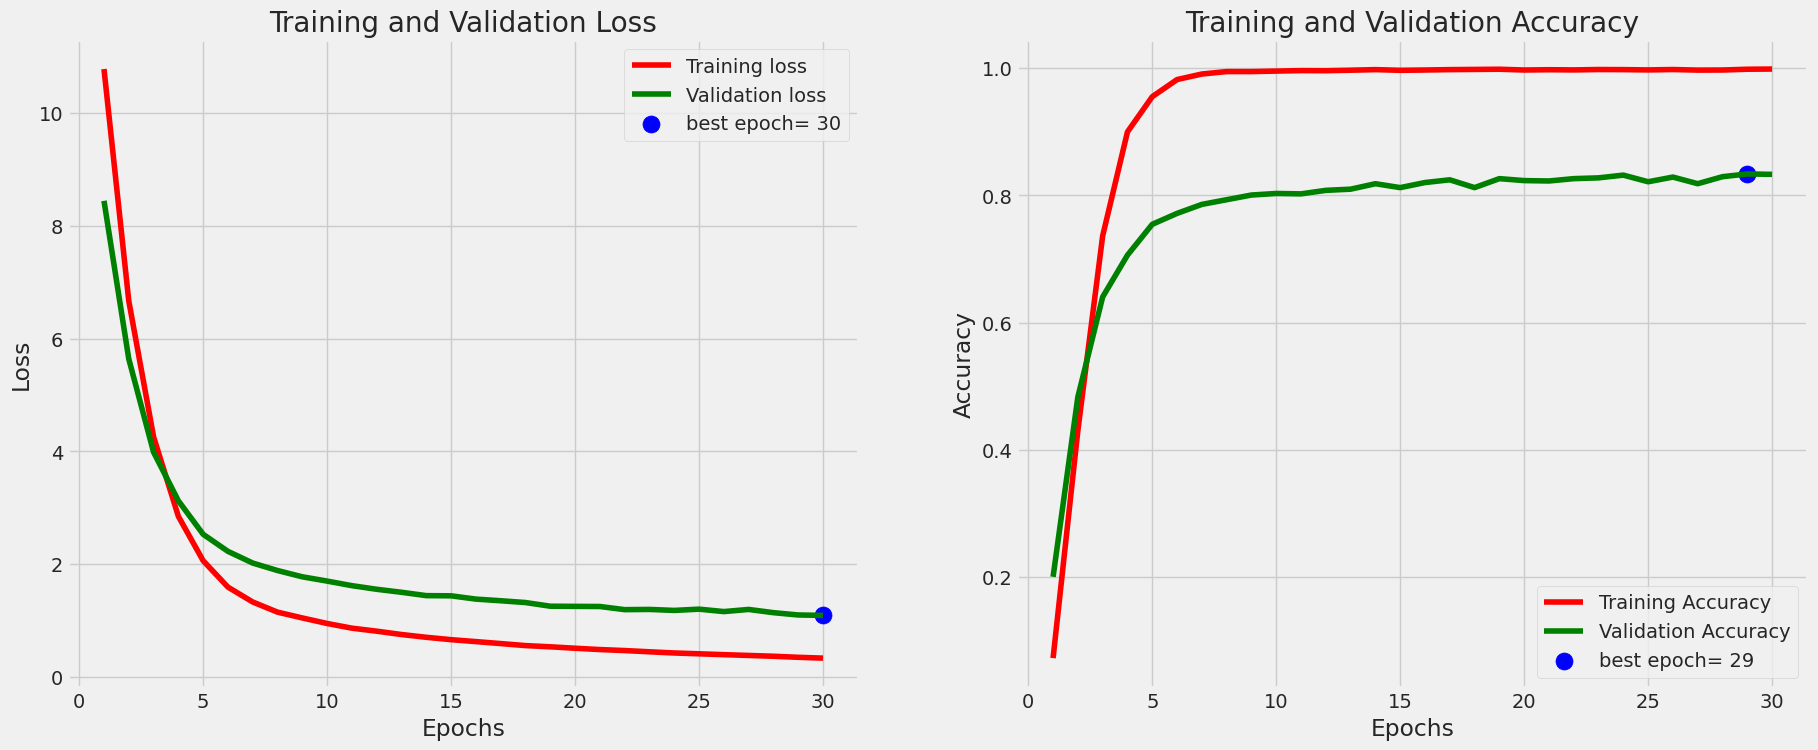

In [31]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [32]:
ts_length = len(ts_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

187/187 [==============================] - 27s 145ms/step - loss: 1.0167 - accuracy: 0.8453
Train Loss:  0.31479623913764954
Train Accuracy:  0.9989973306655884
--------------------
Validation Loss:  1.0915476083755493
Validation Accuracy:  0.8330264091491699
--------------------
Test Loss:  1.0167467594146729
Test Accuracy:  0.8452540040016174


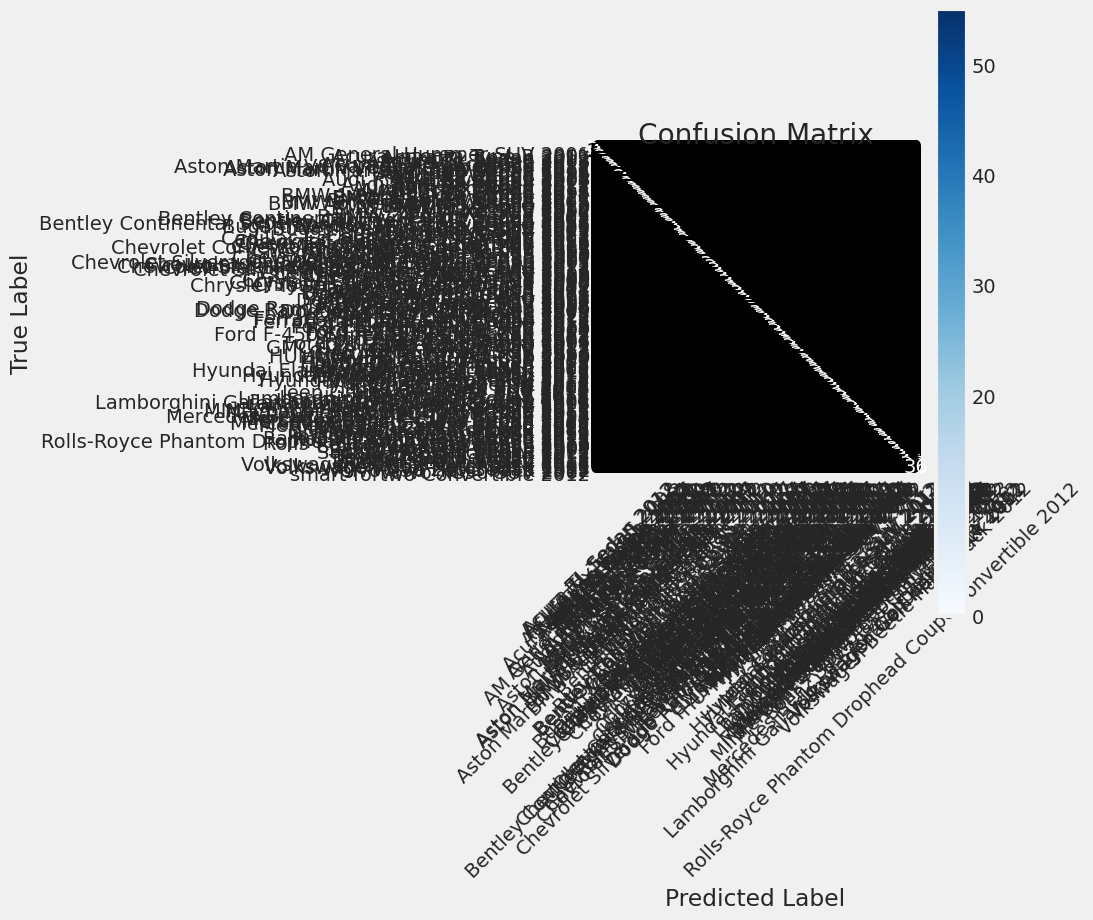

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.98      0.93      0.95        44
                             Acura Integra Type R 2001       0.93      0.86      0.89        44
                                   Acura RL Sedan 2012       0.82      0.72      0.77        32
                                   Acura TL Sedan 2012       0.85      0.93      0.89        43
                                  Acura TL Type-S 2008       0.93      0.95      0.94        42
                                  Acura TSX Sedan 2012       0.89      0.78      0.83        40
                              Acura ZDX Hatchback 2012       0.97      0.74      0.84        39
              Aston Martin V8 Vantage Convertible 2012       0.84      0.58      0.68        45
                    Aston Martin V8 Vantage Coupe 2012       0.70      0.76      0.73        41
                  Aston Martin Virage C

In [33]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [43]:
model.save_weights("/kaggle/working/EfficientNetB3_ju_vehicle.h5")

In [44]:
ts_length = len(ts_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

137/137 [==============================] - 12s 85ms/step - loss: 0.4257 - accuracy: 0.9367
Train Loss:  0.1341318041086197
Train Accuracy:  1.0
--------------------
Validation Loss:  0.18892446160316467
Validation Accuracy:  0.9885321259498596
--------------------
Test Loss:  0.4256553053855896
Test Accuracy:  0.9367396831512451


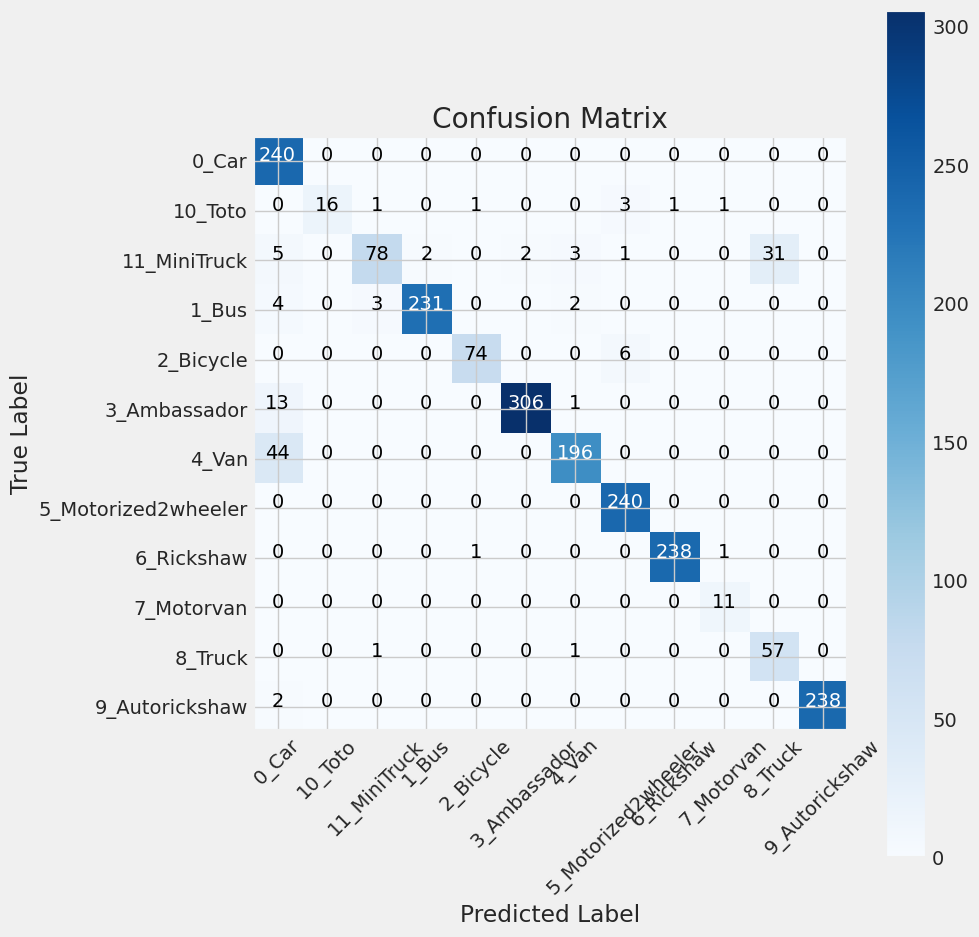

                     precision    recall  f1-score   support

              0_Car       0.78      1.00      0.88       240
            10_Toto       1.00      0.70      0.82        23
       11_MiniTruck       0.94      0.64      0.76       122
              1_Bus       0.99      0.96      0.98       240
          2_Bicycle       0.97      0.93      0.95        80
       3_Ambassador       0.99      0.96      0.97       320
              4_Van       0.97      0.82      0.88       240
5_Motorized2wheeler       0.96      1.00      0.98       240
         6_Rickshaw       1.00      0.99      0.99       240
         7_Motorvan       0.85      1.00      0.92        11
            8_Truck       0.65      0.97      0.78        59
     9_Autorickshaw       1.00      0.99      1.00       240

           accuracy                           0.94      2055
          macro avg       0.92      0.91      0.91      2055
       weighted avg       0.95      0.94      0.94      2055



In [45]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
import os
import pandas as pd
import numpy as np

# Load the EfficientNetB3 model
base_model_efnetb3 = EfficientNetB3(include_top=False, input_shape=(224, 224, 3))
base_model_efnetb3.load_weights('/kaggle/working/EfficientNetB3_BrainTumor_Crystal_Weights.h5', by_name=True)

x = base_model_efnetb3.output
x = GlobalAveragePooling2D()(x)
feature_extraction_model = Model(inputs=base_model_efnetb3.input, outputs=x)

labels = {'glioma_tumor':1,'no_tumor':0,'meningioma_tumor':2,'pituitary_tumor':3}
training_global_average_pool_2d_efnetb3 = []
testing_global_average_pool_2d_efnetb3 = []


In [ ]:
main_folder = '/kaggle/working/crystal/train'
total_files=1
subfiles=1
# Iterate through subfolders and print subfolder name and file names
for root, dirs, files in os.walk(main_folder):
  print(total_files)
  for file in files:
    if file.endswith(('jpg', 'jpeg', 'png')):
      d=[]
      file_path = os.path.join(root, file)  # Check for image file formats
      img = image.load_img(file_path, target_size=(224, 224))
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      processed_img = preprocess_input(img_array)
      global_average_features = feature_extraction_model.predict(processed_img)
      one_dim_list = np.array(global_average_features).flatten()
      sub_folder_name=os.path.basename(root)
      ch=labels[sub_folder_name]
      d.append(sub_folder_name+'_'+file)
      d.extend(one_dim_list)
      d.append(ch)
      training_global_average_pool_2d_efnetb3.append(d)
      subfiles+=1
      total_files+=1

In [ ]:
training_df=pd.DataFrame(training_global_average_pool_2d_efnetb3)

In [ ]:
training_df

In [ ]:
main_folder = '/kaggle/working/crystal/test'
total_files=1
subfiles=1
# Iterate through subfolders and print subfolder name and file names
for root, dirs, files in os.walk(main_folder):
  print(total_files)
  for file in files:
    if file.endswith(('jpg', 'jpeg', 'png')):
      d=[]
      file_path = os.path.join(root, file)  # Check for image file formats
      img = image.load_img(file_path, target_size=(224, 224))
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      processed_img = preprocess_input(img_array)
      global_average_features = feature_extraction_model.predict(processed_img)
      one_dim_list = np.array(global_average_features).flatten()
      sub_folder_name=os.path.basename(root)
      ch=labels[sub_folder_name]
      d.append(sub_folder_name+'_'+file)
      d.extend(one_dim_list)
      d.append(ch)
      testing_global_average_pool_2d_efnetb3.append(d)
      subfiles+=1
      total_files+=1

In [ ]:
testing_df=pd.DataFrame(testing_global_average_pool_2d_efnetb3)

In [ ]:
testing_df

In [ ]:
# Save Testing DataFrame to a CSV file
testing_df.to_csv('/kaggle/working/testing_global_average_pool_2d_efnetb3_trained_weights_new.csv', index=False)

# Save Training DataFrame to a CSV file
training_df.to_csv('/kaggle/working/training_global_average_pool_2d_efnetb3_trained_weights_new.csv', index=False)

Number of Reduced Features VS. Accuracy of SVM (Polynomial) Classifier

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('/kaggle/working/training_global_average_pool_2d_efnetb3_trained_weights_new.csv')

# Separate features and target
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

# Initialize the MinMaxScaler and apply it
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Initialize the SVM Classifier
clf = SVC(kernel='poly', gamma = 0.5, C = 0.1, random_state=7)

# Load the unseen testing dataset
df_test = pd.read_csv('/kaggle/working/testing_global_average_pool_2d_efnetb3_trained_weights_new.csv')

X_test = df_test.iloc[:, 1:-1]
y_test = df_test.iloc[:, -1]

X_test = scaler.transform(X_test)

# Define the range of k
k_values = range(1000, 1501, 50)

# Initialize a list to store accuracy for each k
accuracy_list = []

for k in k_values:
    # Apply Mutual Information for feature selection
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    # Train the model
    clf.fit(X_train_k, y_train)

    # Predict the labels of the test set
    y_pred = clf.predict(X_test_k)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('/kaggle/working/training_global_average_pool_2d_efnetb3_trained_weights_new.csv')

# Separate features and target
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

# Initialize the MinMaxScaler and apply it
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Initialize the SVM Classifier
clf = SVC(kernel='poly', gamma = 0.5, C = 0.1, random_state=7)

# Train the model
clf.fit(X_train, y_train)

# Load the unseen testing dataset
df_test = pd.read_csv('/kaggle/working/testing_global_average_pool_2d_efnetb3_trained_weights_new.csv')

X_test = df_test.iloc[:, 1:-1]
y_test = df_test.iloc[:, -1]

X_test = scaler.transform(X_test)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("SVM (Polynomial) \n")
print(classification_report(y_test, y_pred))

# print('\n------------------ Confusion Matrix -----------------\n')

print("Confusion Matrix \n")
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.show()

print('\nAccuracy SVM (Polynomial): {:.2f} %'.format(accuracy_score(y_test,y_pred)*100))
